# Baseline situation for all stations: Original meteorological and current pumping scenario

In [1]:
    # import all necessary libraries 
    import pandas as pd
    import pastas as ps
    import numpy as np
    import matplotlib.pyplot as plt

    ps.set_log_level("ERROR")
    ps.show_versions()

Python version: 3.11.4
NumPy version: 1.23.5
Pandas version: 1.5.3
SciPy version: 1.10.1
Matplotlib version: 3.7.1
Numba version: 0.57.0
LMfit version: 1.2.2
Latexify version: Not Installed
Pastas version: 1.2.0


# Apply loop through all observation wells load all stresses

In [2]:
names_obs_wells = ["SN01", "SN02", "SN03", "SN05", "SN08", "SN12", "SN13", "SN15", "SN16", "SN18", "SN21", "SN22"]

# Loop through each observation well
for i in range(12):
    """ SECTION 1: LOAD DATA """
    # Define the data path
    data_path = "E://DA//Datafiles_Sesay//"

    # Load Groundwater Level (GWL) data
    ho = pd.read_csv(data_path + names_obs_wells[i] + "_WL.csv", parse_dates=["Date"], index_col="Date").squeeze()

    # Load Rainfall data
    rain = pd.read_csv(data_path + "Rain.csv", parse_dates=["Date"], index_col="Date").squeeze()

    # Load Evaporation data
    evap = pd.read_csv(data_path + "AET.csv", parse_dates=["Date"], index_col="Date").squeeze()

    # Load Synthetic Pumping data
    Pumping = pd.read_csv(data_path + "pumping.csv", parse_dates=["Date"], index_col="Date").squeeze().astype(float)


    
    

# Plot raw stressor data only (input data) GWL data

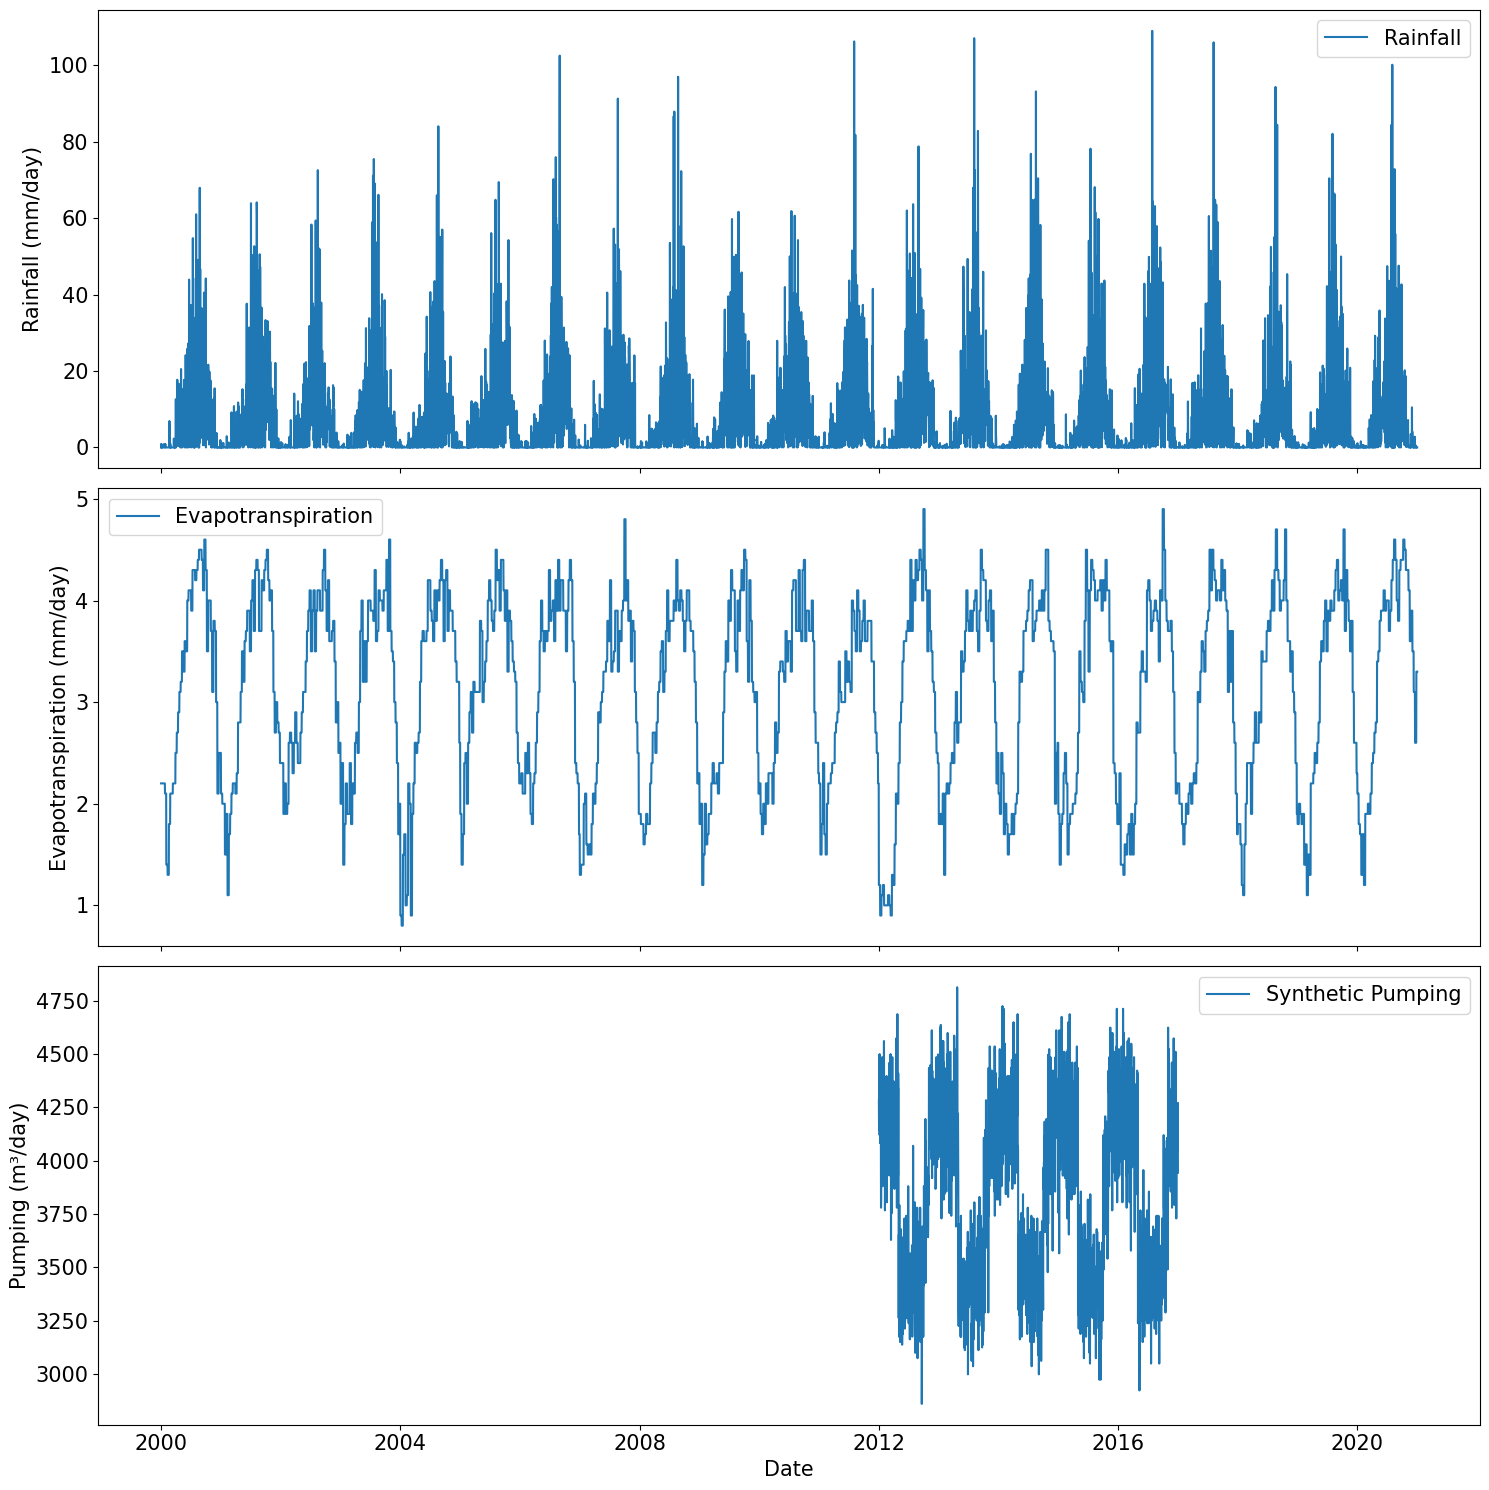

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data path
data_path = "E://DA//Datafiles_Sesay//"

# Load stressor data
rain = pd.read_csv(data_path + "Rain.csv", parse_dates=["Date"], index_col="Date").squeeze()
evap = pd.read_csv(data_path + "AET.csv", parse_dates=["Date"], index_col="Date").squeeze()
Pumping = pd.read_csv(data_path + "pumping.csv", parse_dates=["Date"], index_col="Date").squeeze()

# Define font sizes
label_fontsize = 15
legend_fontsize = 15
tick_fontsize = 15

# Create a figure with subplots
fig, axs = plt.subplots(3, 1, figsize=(15, 15), sharex=True)

# Plot rainfall
axs[0].plot(rain, label="Rainfall")
axs[0].set_ylabel("Rainfall (mm/day)", fontsize=label_fontsize)
axs[0].legend(fontsize=legend_fontsize)
axs[0].tick_params(labelsize=tick_fontsize)

# Plot evaporation
axs[1].plot(evap, label="Evapotranspiration")
axs[1].set_ylabel("Evapotranspiration (mm/day)", fontsize=label_fontsize)
axs[1].legend(fontsize=legend_fontsize)
axs[1].tick_params(labelsize=tick_fontsize)

# Plot synthetic pumping data
axs[2].plot(Pumping, label="Synthetic Pumping")
axs[2].set_ylabel("Pumping (m³/day)", fontsize=label_fontsize)
axs[2].legend(fontsize=legend_fontsize)
axs[2].tick_params(labelsize=tick_fontsize)

# Set common x-axis label
plt.xlabel("Date", fontsize=label_fontsize)

# Adjust spacing between subplots
plt.tight_layout()

# Save plot before showing it
plt.savefig(f"{data_path}stressors_data.png", dpi=400)

# Show the plot
plt.show()



# Plot raw GWL data, convert depth to GW to groundwater level elevation before preprocessing  

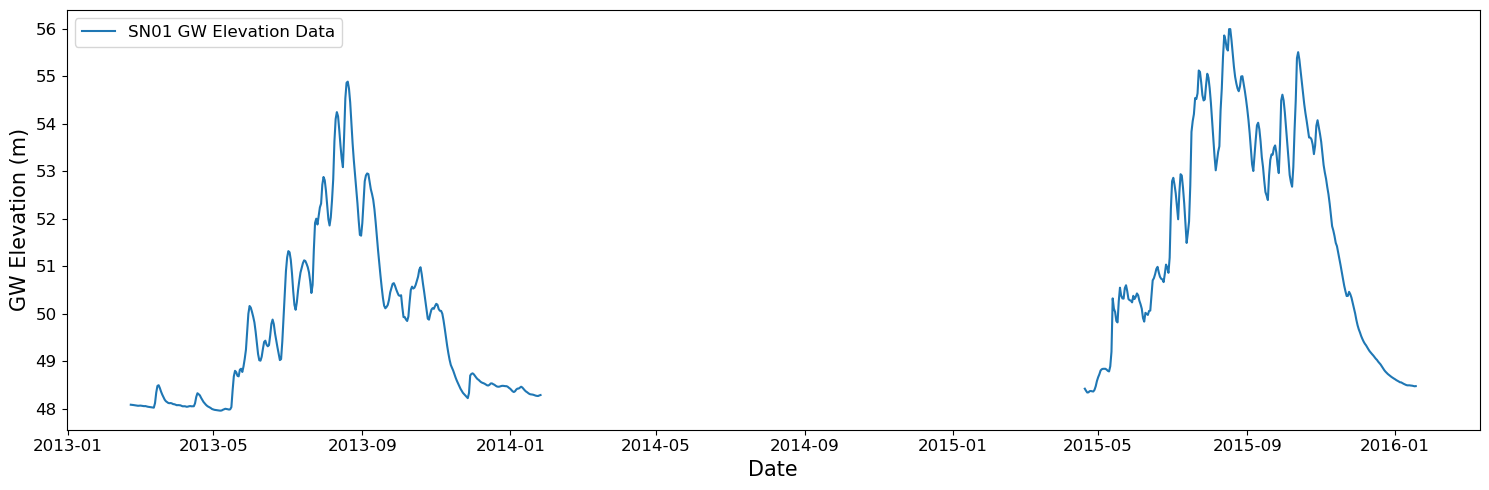

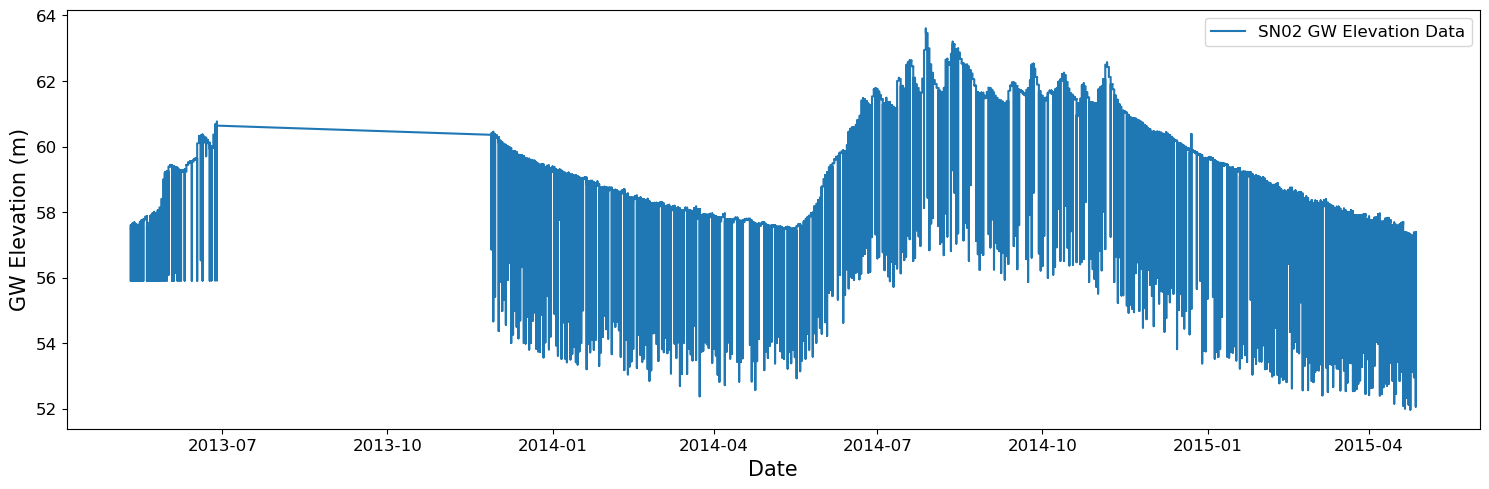

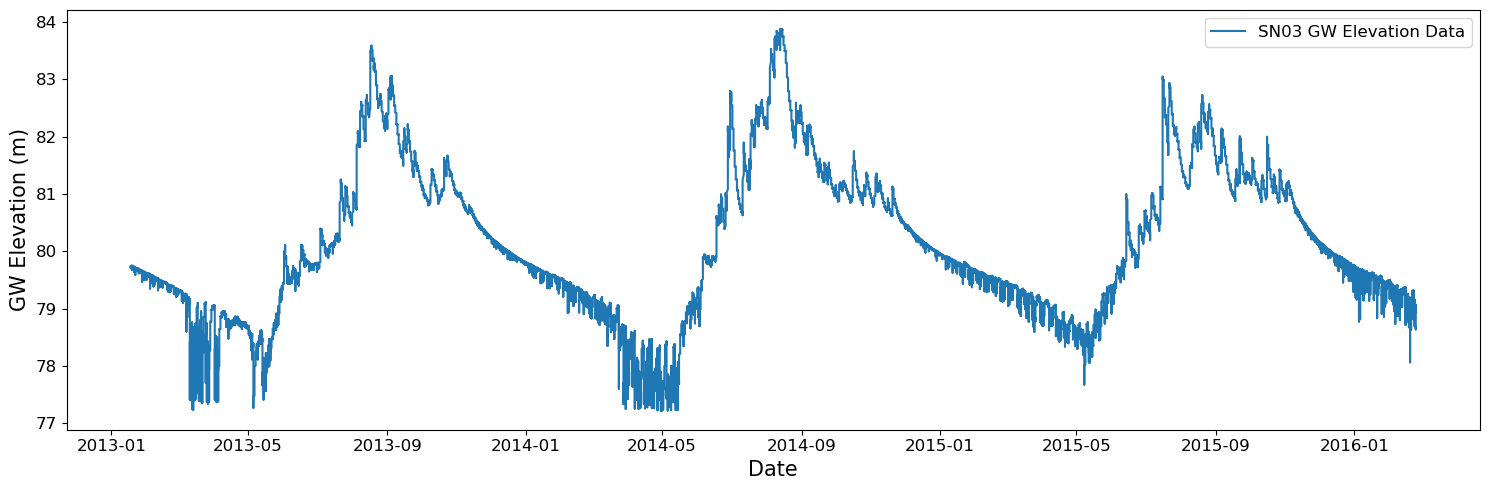

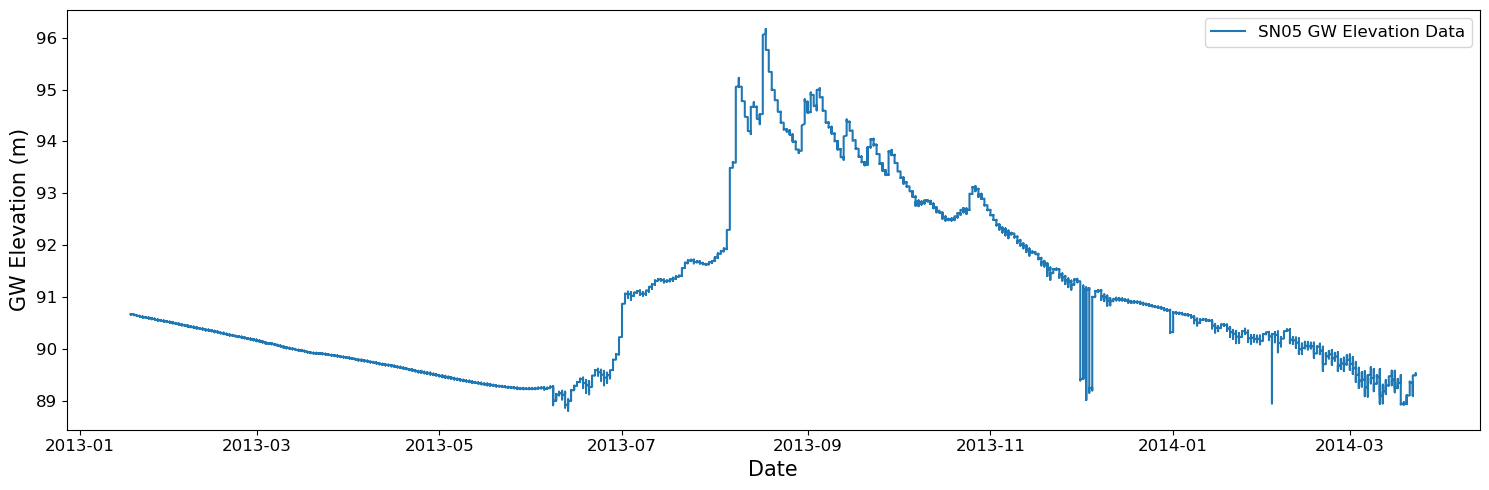

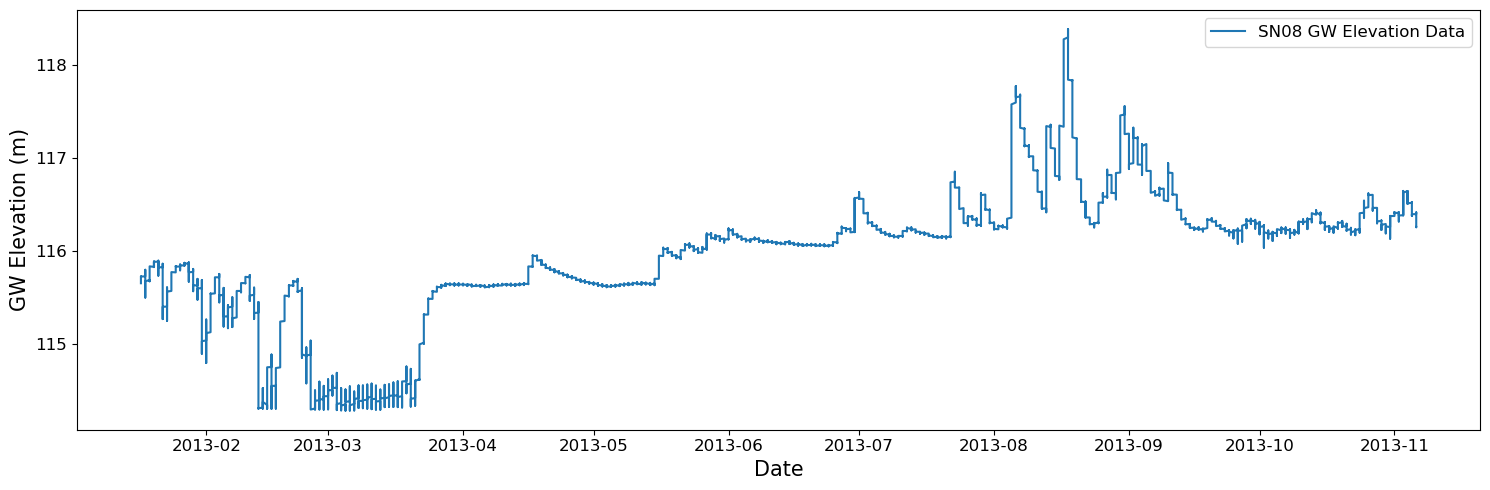

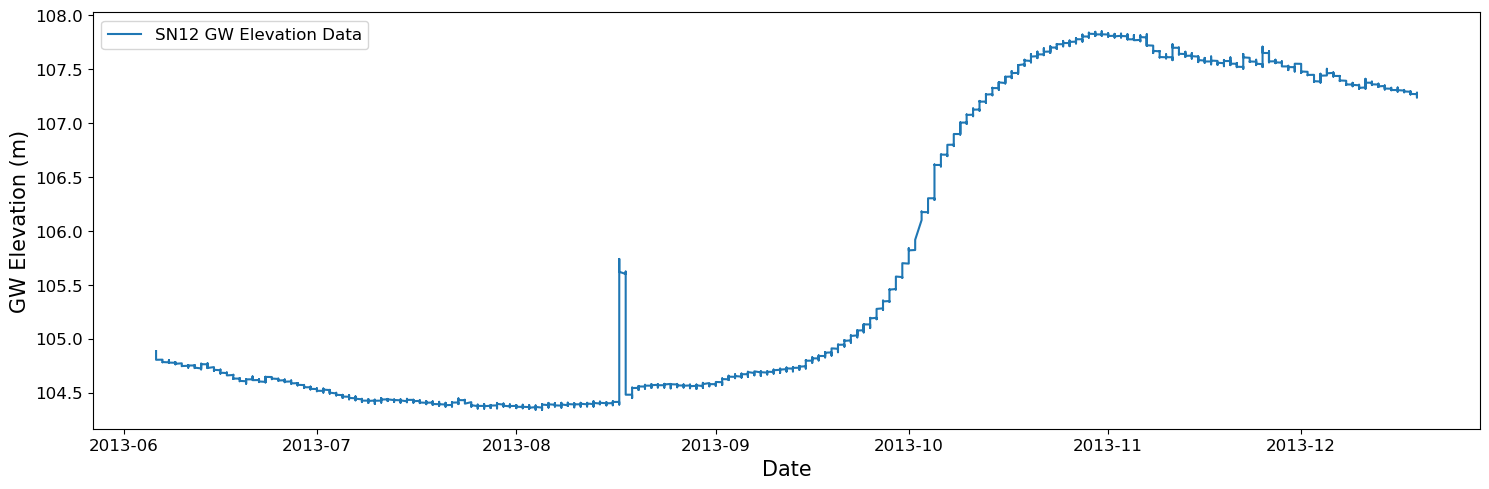

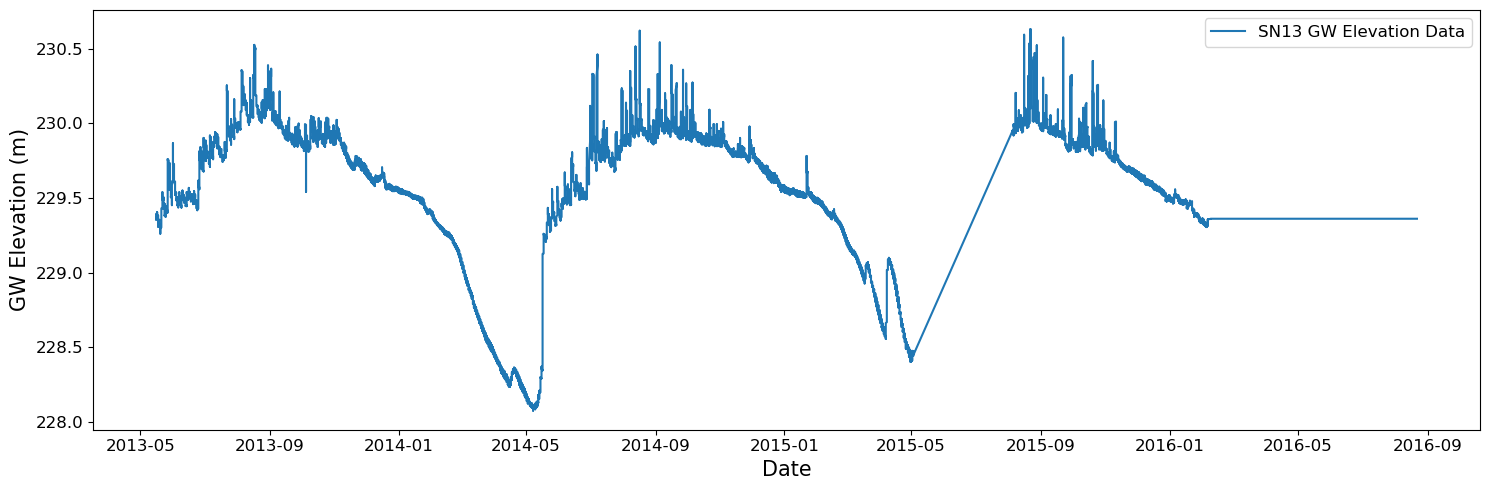

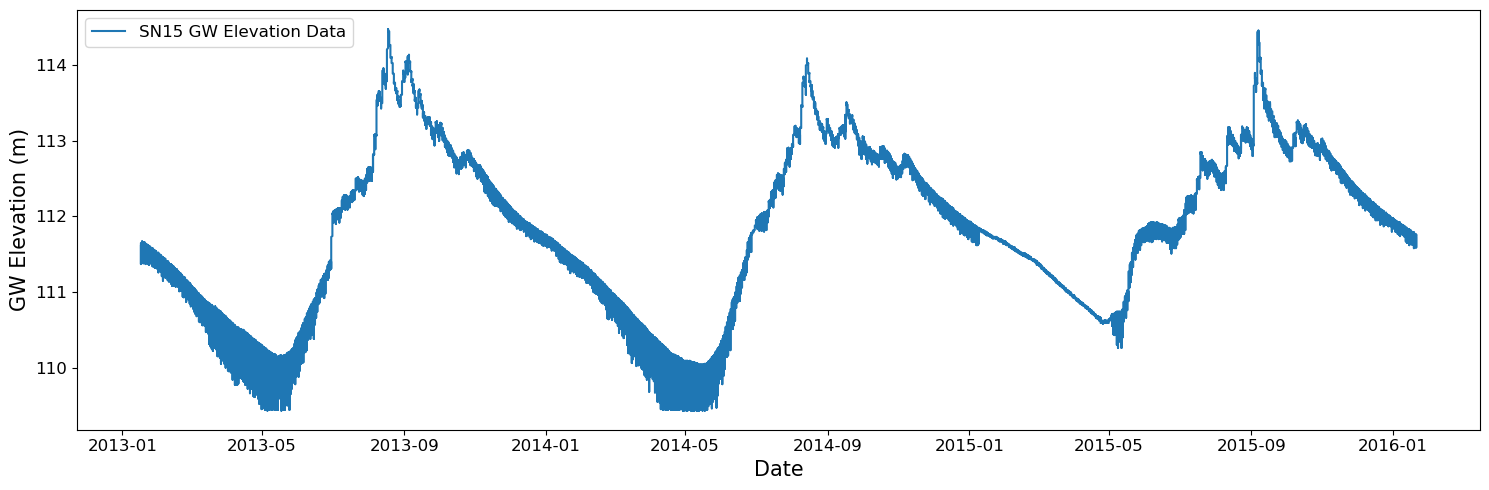

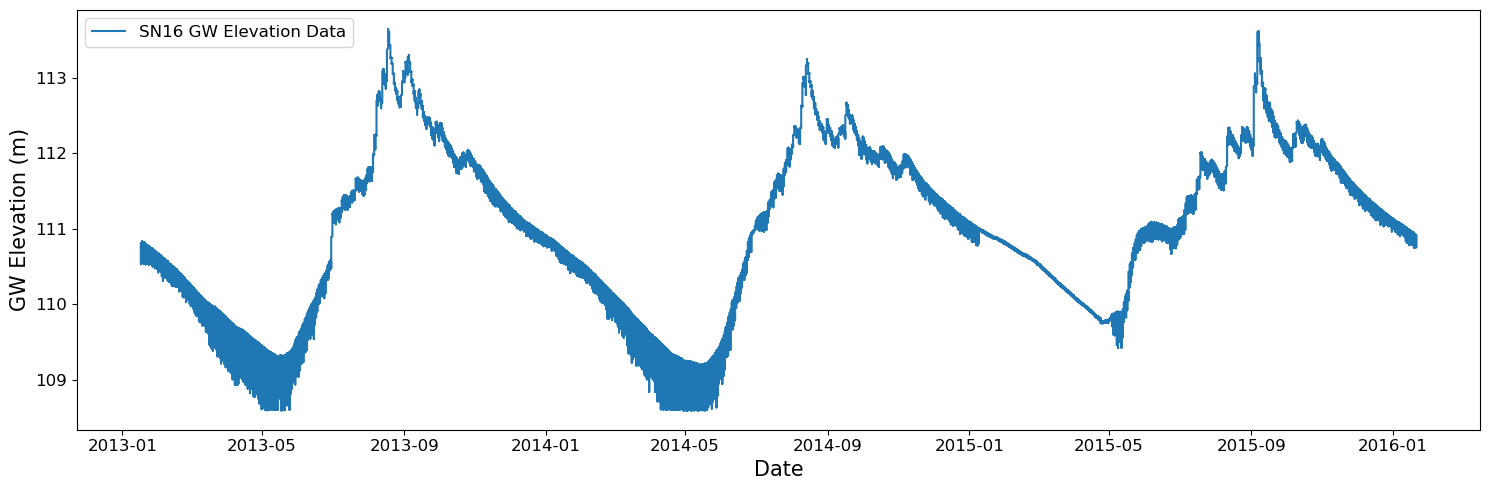

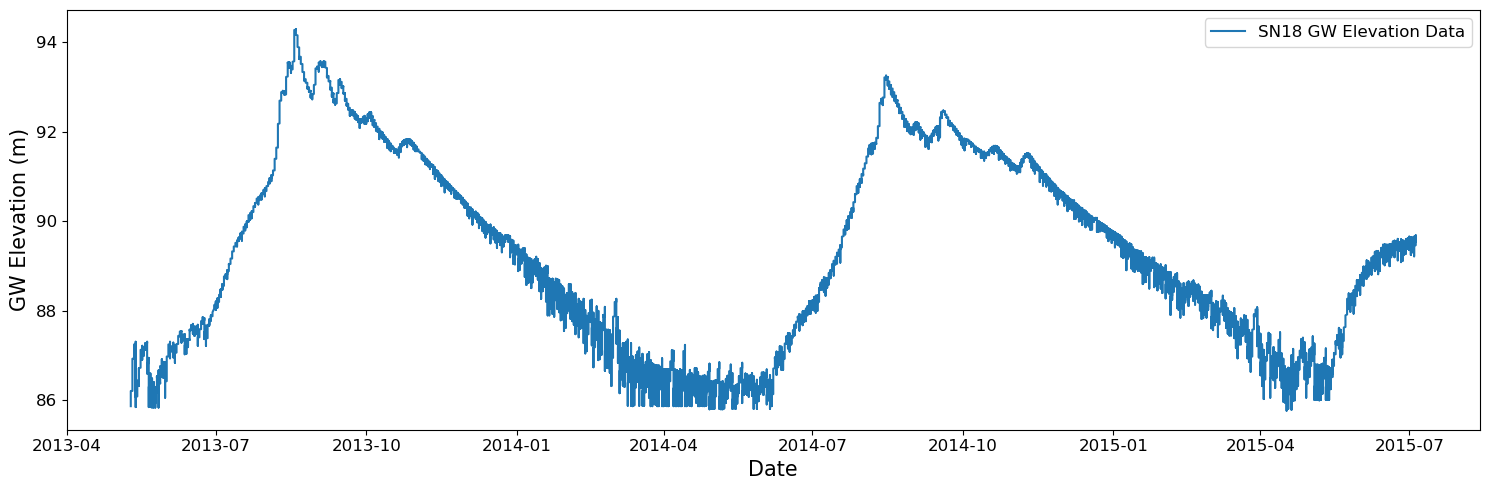

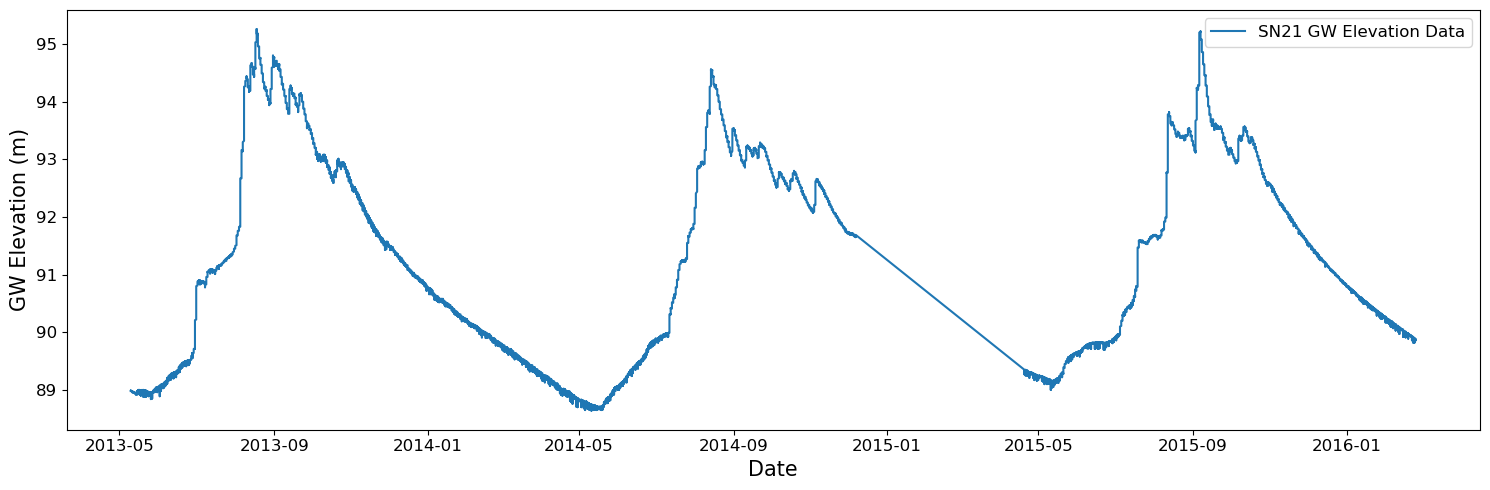

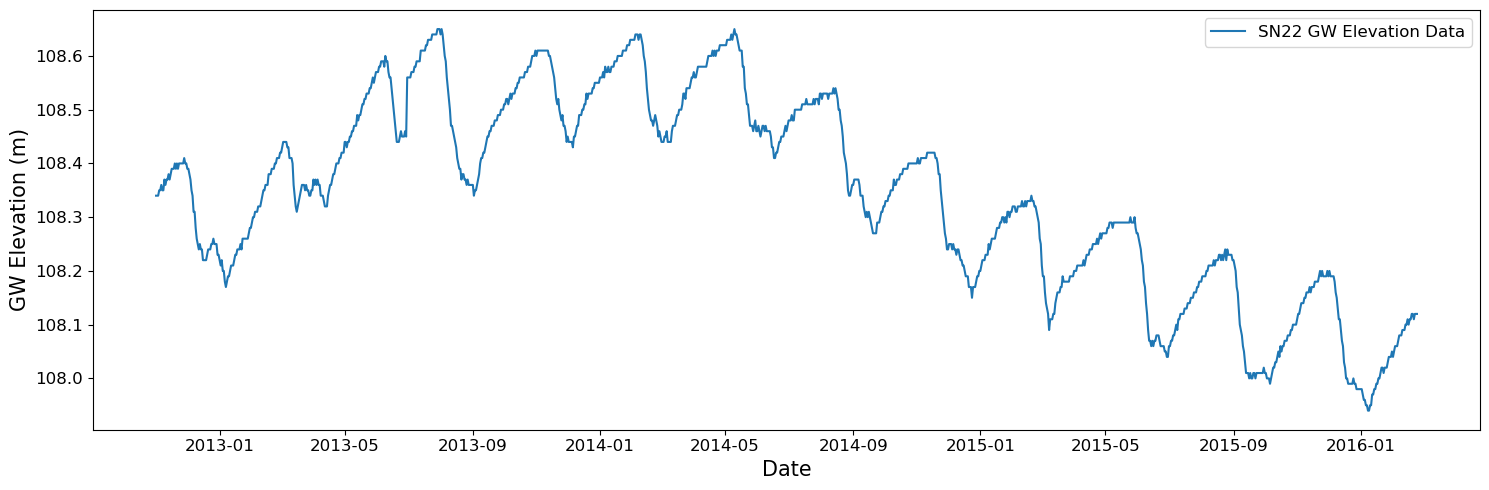

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

names_obs_wells = ["SN01", "SN02", "SN03", "SN05", "SN08", "SN12", "SN13", "SN15", "SN16", "SN18", "SN21", "SN22"]
data_path = "E://DA//Datafiles_Sesay//"

# Reference elevations for each well
reference_elevations = {
    "SN01": 61.43, "SN02": 68.1, "SN03": 85.59, "SN05": 98.64, "SN08": 121.5, "SN12": 129.5,
    "SN13": 231.1, "SN15": 118.2, "SN16": 117.36, "SN18": 100.57, "SN21": 98.5, "SN22": 122.6
}

# Define font sizes
label_fontsize = 15
legend_fontsize = 12
tick_fontsize = 12

# Loop through each observation well
for well_name in names_obs_wells:
    # Load Groundwater Level (GWL) data
    ho = pd.read_csv(data_path + well_name + "_WL.csv", parse_dates=["Date"], index_col="Date").squeeze()

    # Convert GWL data from depth to elevation
    ho_elevation = reference_elevations[well_name] - ho

    # Create a figure for each well
    plt.figure(figsize=(15, 5))

    # Plot Groundwater Elevation data
    plt.plot(ho_elevation.index, ho_elevation.values, label=f"{well_name} GW Elevation Data")
    plt.ylabel("GW Elevation (m)", fontsize=label_fontsize)
    plt.legend(fontsize=legend_fontsize)
    plt.tick_params(labelsize=tick_fontsize)
    plt.xlabel("Date", fontsize=label_fontsize)

    # Adjust layout
    plt.tight_layout()

    # Save plot before showing it
    plt.savefig(f"{data_path}{well_name}_GWE_raw_data.png", dpi=400)

    # Show the plot
    plt.show()


# Groundwater level plotted for all stations, all in one plot 

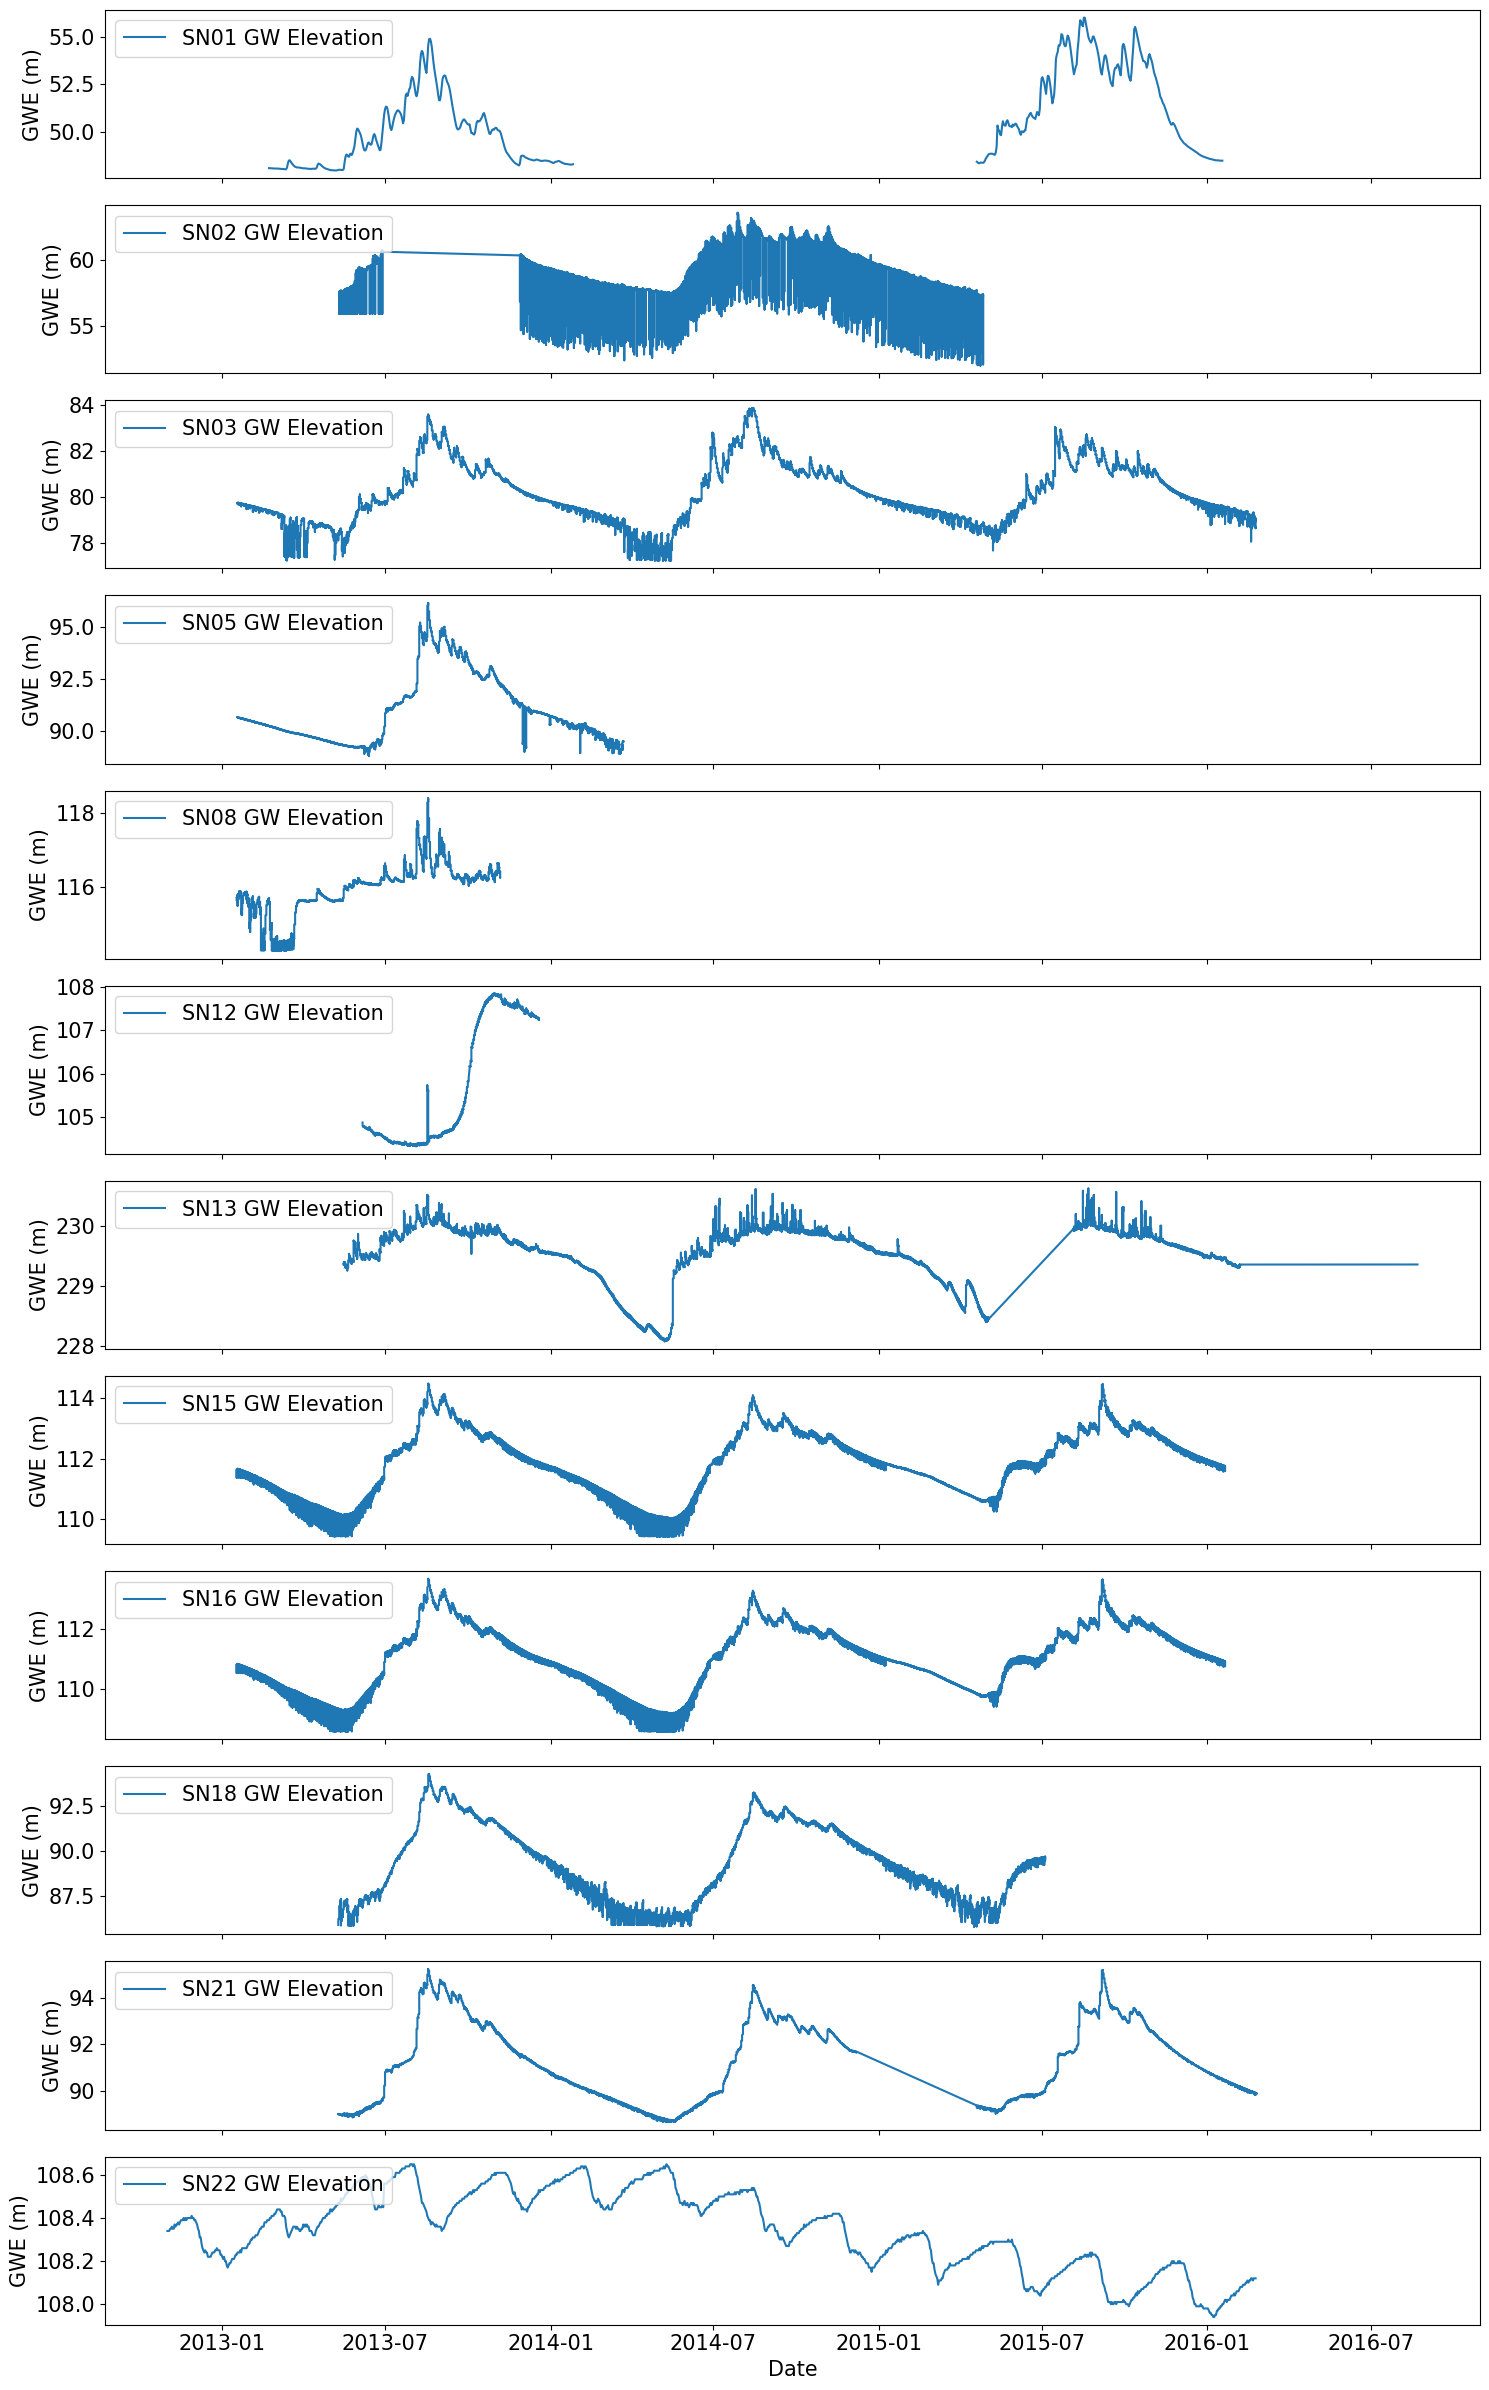

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

names_obs_wells = ["SN01", "SN02", "SN03", "SN05", "SN08", "SN12", "SN13", "SN15", "SN16", "SN18", "SN21", "SN22"]
data_path = "E://DA//Datafiles_Sesay//"

# Reference elevations for each well
reference_elevations = {
    "SN01": 61.43, "SN02": 68.1, "SN03": 85.59, "SN05": 98.64, "SN08": 121.5, "SN12": 129.5,
    "SN13": 231.1, "SN15": 118.2, "SN16": 117.36, "SN18": 100.57, "SN21": 98.5, "SN22": 122.6
}

# Define font sizes
label_fontsize = 15
legend_fontsize = 15
tick_fontsize = 15

# Number of subplots needed (one for each observation well)
num_plots = len(names_obs_wells)

# Create a figure with subplots
fig, axs = plt.subplots(num_plots, 1, figsize=(15, 2*num_plots), sharex=True)

# Loop through each observation well and plot the data
for i, well_name in enumerate(names_obs_wells):
    # Load Groundwater Level (GWL) data
    ho = pd.read_csv(data_path + well_name + "_WL.csv", parse_dates=["Date"], index_col="Date").squeeze()

    # Convert GWL data from depth to elevation
    ho_elevation = reference_elevations[well_name] - ho

    # Plot Groundwater Elevation data for each well
    axs[i].plot(ho_elevation.index, ho_elevation.values, label=f"{well_name} GW Elevation")
    axs[i].set_ylabel("GWE (m)", fontsize=label_fontsize)
    axs[i].legend(loc='upper left', fontsize=legend_fontsize)
    axs[i].tick_params(labelsize=tick_fontsize)

# Set common x-axis label
plt.xlabel("Date", fontsize=label_fontsize)

# Adjust layout
plt.tight_layout()

# Save plot before showing it
plt.savefig(f"{data_path}all_wells_GWE_raw_data.png", dpi=400)

# Show the plot
plt.show()


# Resample all data to daily frequency

In [8]:

    data_path = "E://DA//Datafiles_Sesay//"
    names_obs_wells = ["SN01", "SN02", "SN03", "SN05", "SN08", "SN12", "SN13", "SN15", "SN16", "SN18", "SN21", "SN22"]
    additional_data_files = ["Rain.csv", "AET.csv", "pumping.csv"]

    # Initialize variables to store the overall min and max dates
    overall_min_date = None
    overall_max_date = None

    # Function to update overall min and max dates
    def update_overall_dates(min_date, max_date):
        global overall_min_date, overall_max_date
        if overall_min_date is None or min_date > overall_min_date:
            overall_min_date = min_date
        if overall_max_date is None or max_date < overall_max_date:
            overall_max_date = max_date

    # Function to resample data to daily frequency
    def resample_to_daily(df):
        return df.resample('D').mean()

    # Process and resample data for each well
    for well_name in names_obs_wells:
        try:
            ho = pd.read_csv(data_path + well_name + "_WL.csv", parse_dates=["Date"], index_col="Date")
            ho_daily = resample_to_daily(ho)
            update_overall_dates(ho_daily.index.min(), ho_daily.index.max())
        except Exception as e:
            print(f"Error processing data for well {well_name}: {e}")

    # Process and resample additional data files
    for file in additional_data_files:
        try:
            file_path = data_path + file
            df = pd.read_csv(file_path, parse_dates=["Date"], index_col="Date")
            df_daily = resample_to_daily(df)
            update_overall_dates(df_daily.index.min(), df_daily.index.max())
        except Exception as e:
            print(f"Error processing data from file {file}: {e}")

    # Check if dates were found and print them
    if overall_min_date is not None and overall_max_date is not None:
        print(f"Common Start Date: {overall_min_date}")
        print(f"Common End Date: {overall_max_date}")
    else:
        print("No valid date range found. Check your data files.")


Common Start Date: 2013-06-06 00:00:00
Common End Date: 2013-12-19 00:00:00


# Show start and end date for each of the daily resample GWL data

In [80]:
#check the common starting  end for groundwater level data 

In [24]:

    data_path = "E://DA//Datafiles_Sesay//"
    names_obs_wells = ["SN01", "SN02", "SN03", "SN05", "SN08", "SN12", "SN13", "SN15", "SN16", "SN18", "SN21", "SN22"]

    # Dictionary to store start and end dates for each well
    date_ranges = {}

    # Load data for each well and find the start and end dates
    for well_name in names_obs_wells:
        try:
            ho = pd.read_csv(data_path + well_name + "_WL.csv", parse_dates=["Date"], index_col="Date").squeeze()
            start_date = ho.index.min()
            end_date = ho.index.max()
            date_ranges[well_name] = (start_date, end_date)
        except Exception as e:
            print(f"Error loading data for well {well_name}: {e}")

    # Display the start and end dates for each well
    for well, dates in date_ranges.items():
        print(f"Well {well}: Start Date - {dates[0]}, End Date - {dates[1]}")

    # Find the well with the shortest period
    shortest_well = min(date_ranges, key=lambda k: date_ranges[k][1] - date_ranges[k][0])
    shortest_period = date_ranges[shortest_well][1] - date_ranges[shortest_well][0]
    print(f"\nWell with the shortest period: {shortest_well} ({shortest_period.days} days)")


Well SN01: Start Date - 2013-02-22 00:00:00, End Date - 2016-01-18 00:00:00
Well SN02: Start Date - 2013-05-11 00:00:00, End Date - 2015-04-27 00:00:00
Well SN03: Start Date - 2013-01-18 00:00:00, End Date - 2016-02-24 00:00:00
Well SN05: Start Date - 2013-01-18 00:00:00, End Date - 2014-03-23 00:00:00
Well SN08: Start Date - 2013-01-17 00:00:00, End Date - 2016-10-08 00:00:00
Well SN12: Start Date - 2013-06-06 00:00:00, End Date - 2013-12-19 00:00:00
Well SN13: Start Date - 2013-05-16 00:00:00, End Date - 2016-08-22 00:00:00
Well SN15: Start Date - 2013-01-17 00:00:00, End Date - 2016-01-21 00:00:00
Well SN16: Start Date - 2013-01-17 00:00:00, End Date - 2016-01-21 00:00:00
Well SN18: Start Date - 2013-05-10 00:00:00, End Date - 2015-07-05 00:00:00
Well SN21: Start Date - 2013-05-10 00:00:00, End Date - 2016-02-25 00:00:00
Well SN22: Start Date - 2012-11-01 00:00:00, End Date - 2016-02-24 00:00:00

Well with the shortest period: SN12 (196 days)


# Plot each individual GWL vs their respective stresses, the range of GWL data being the refence point for all stresses

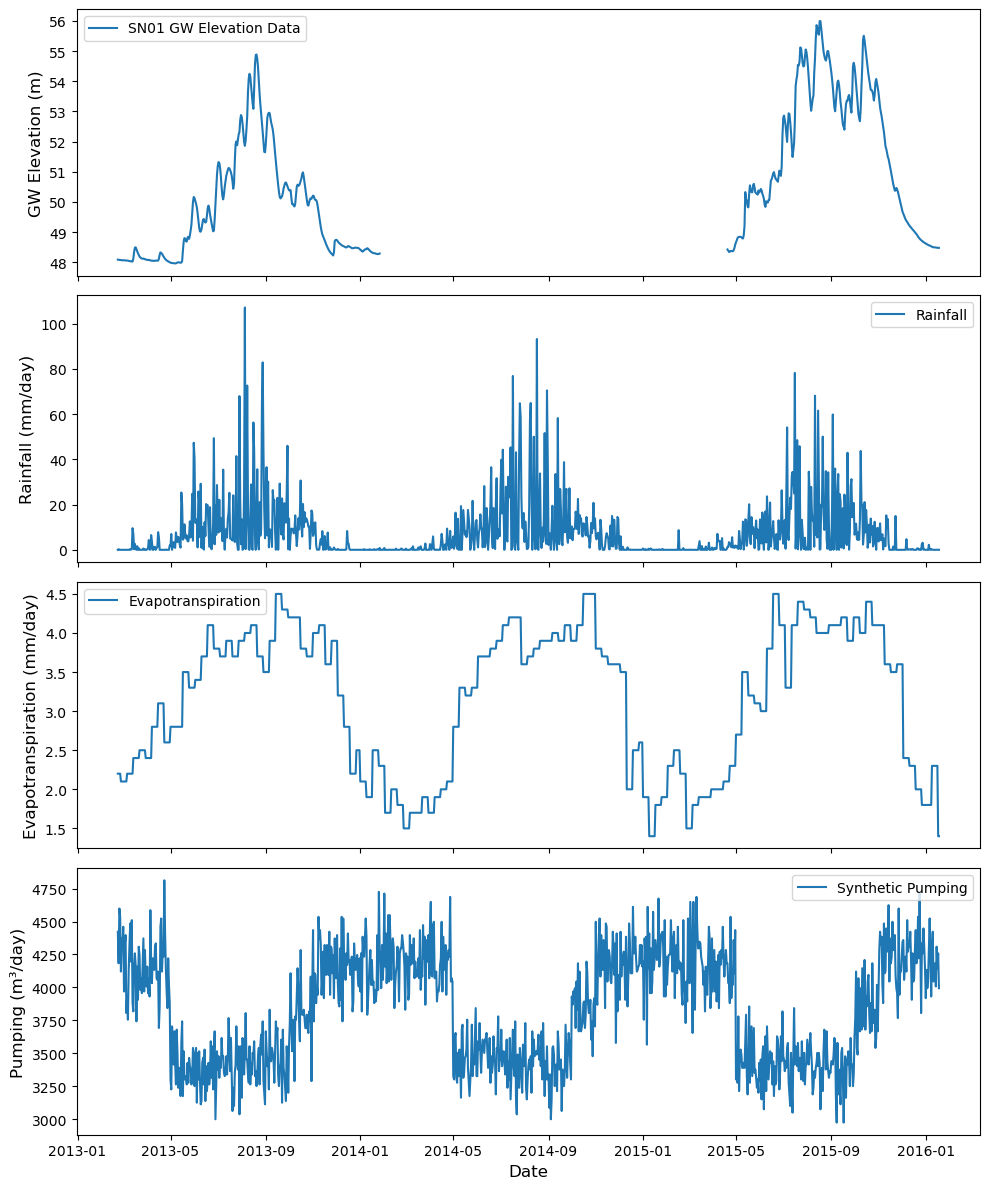

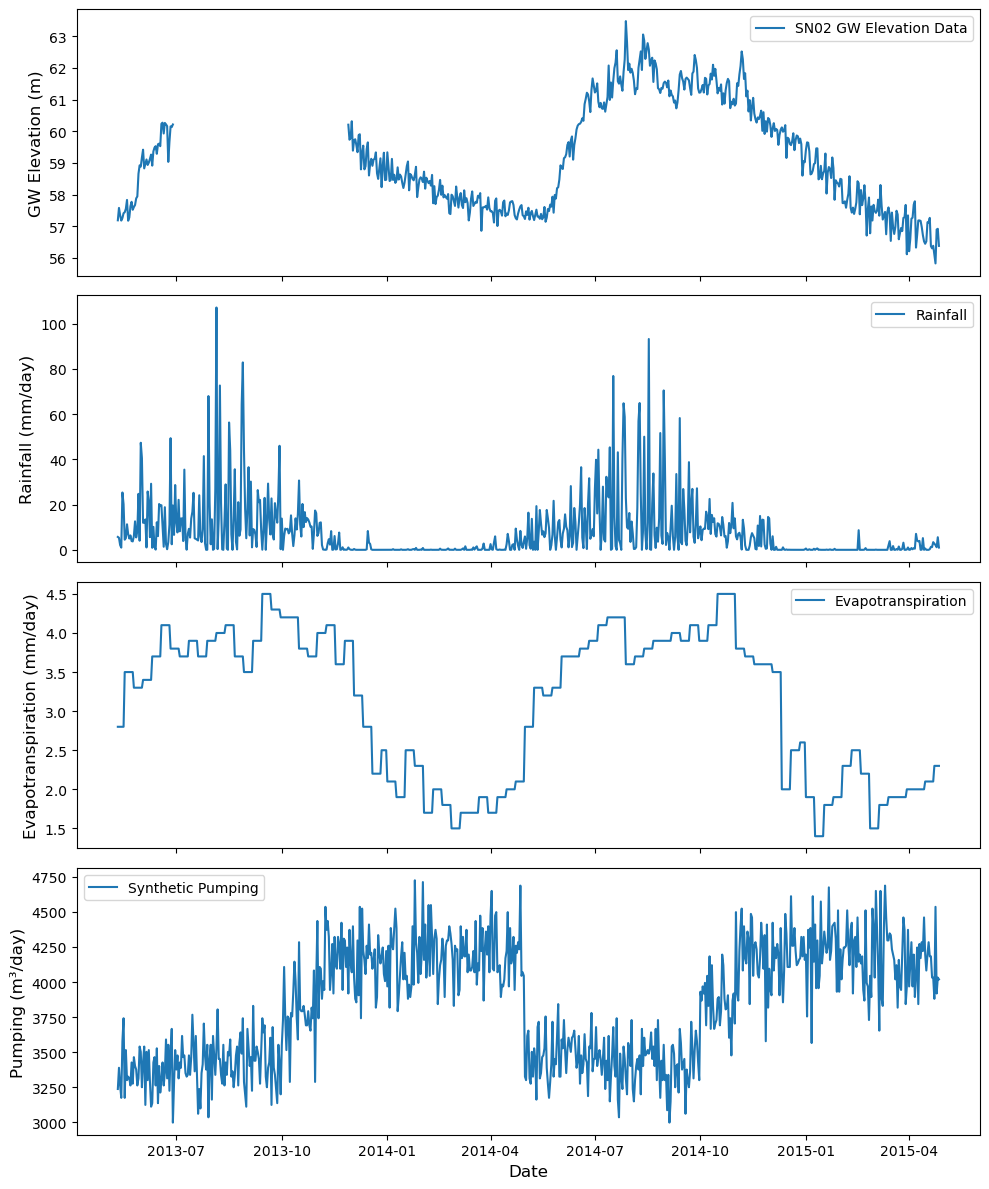

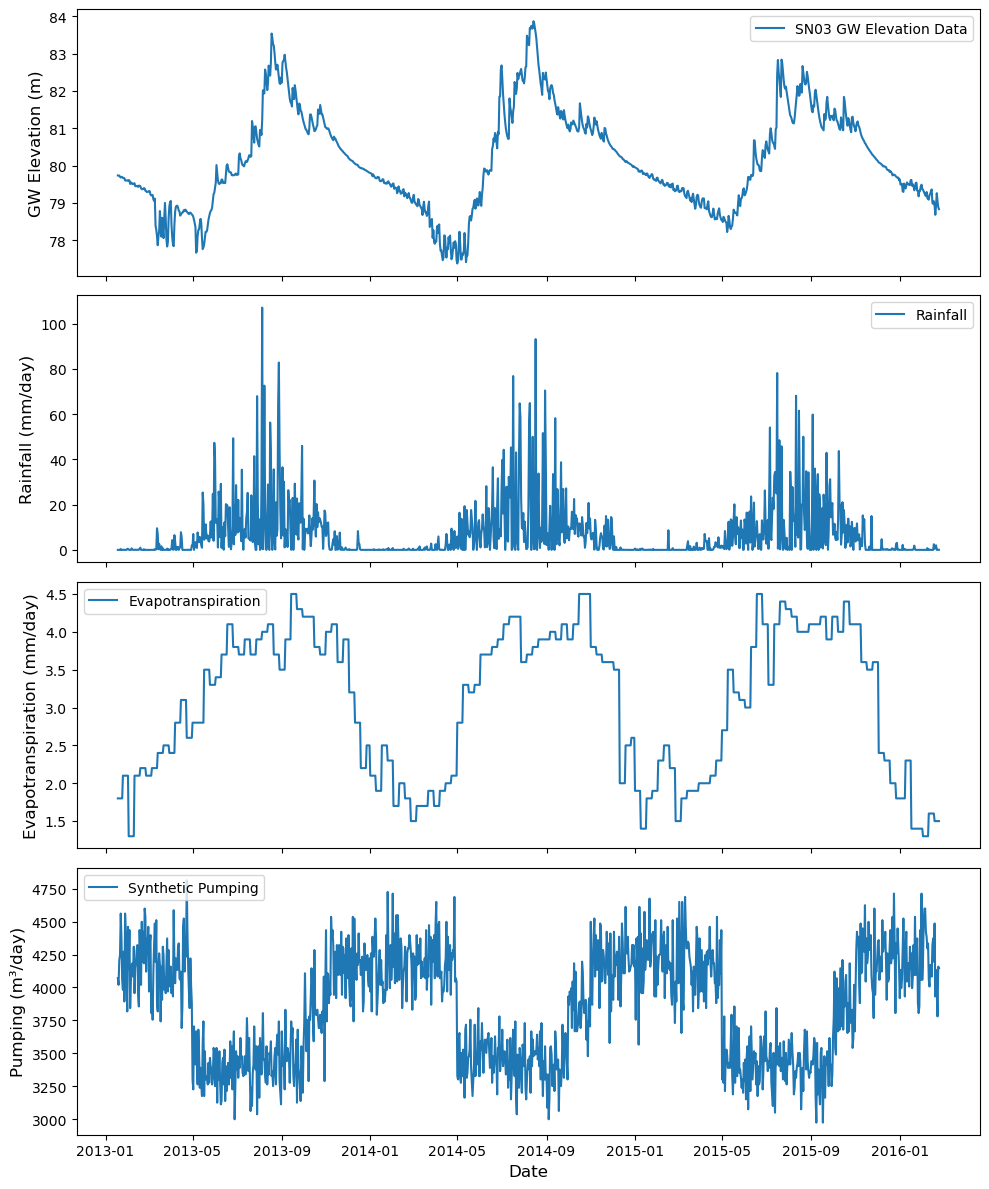

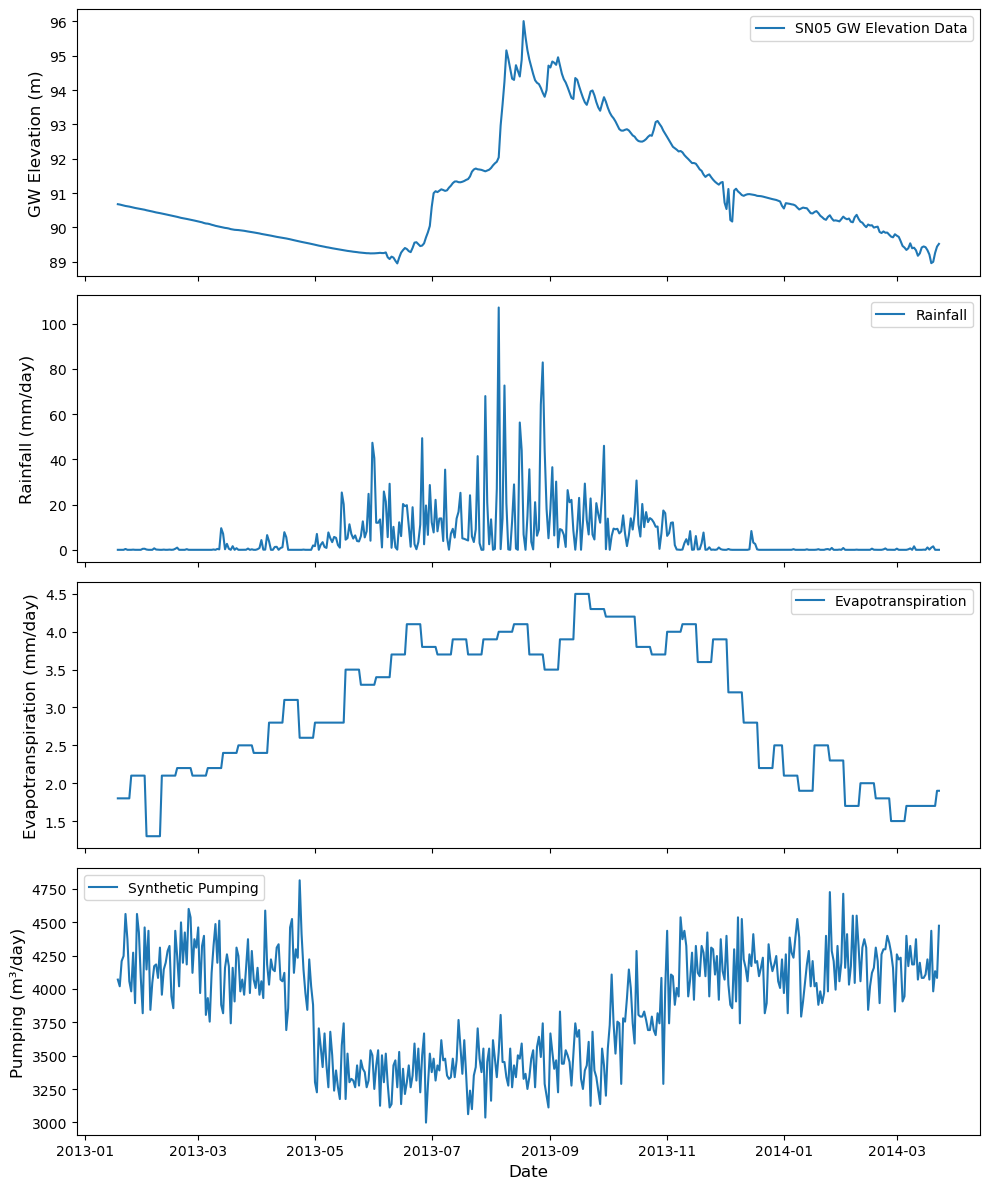

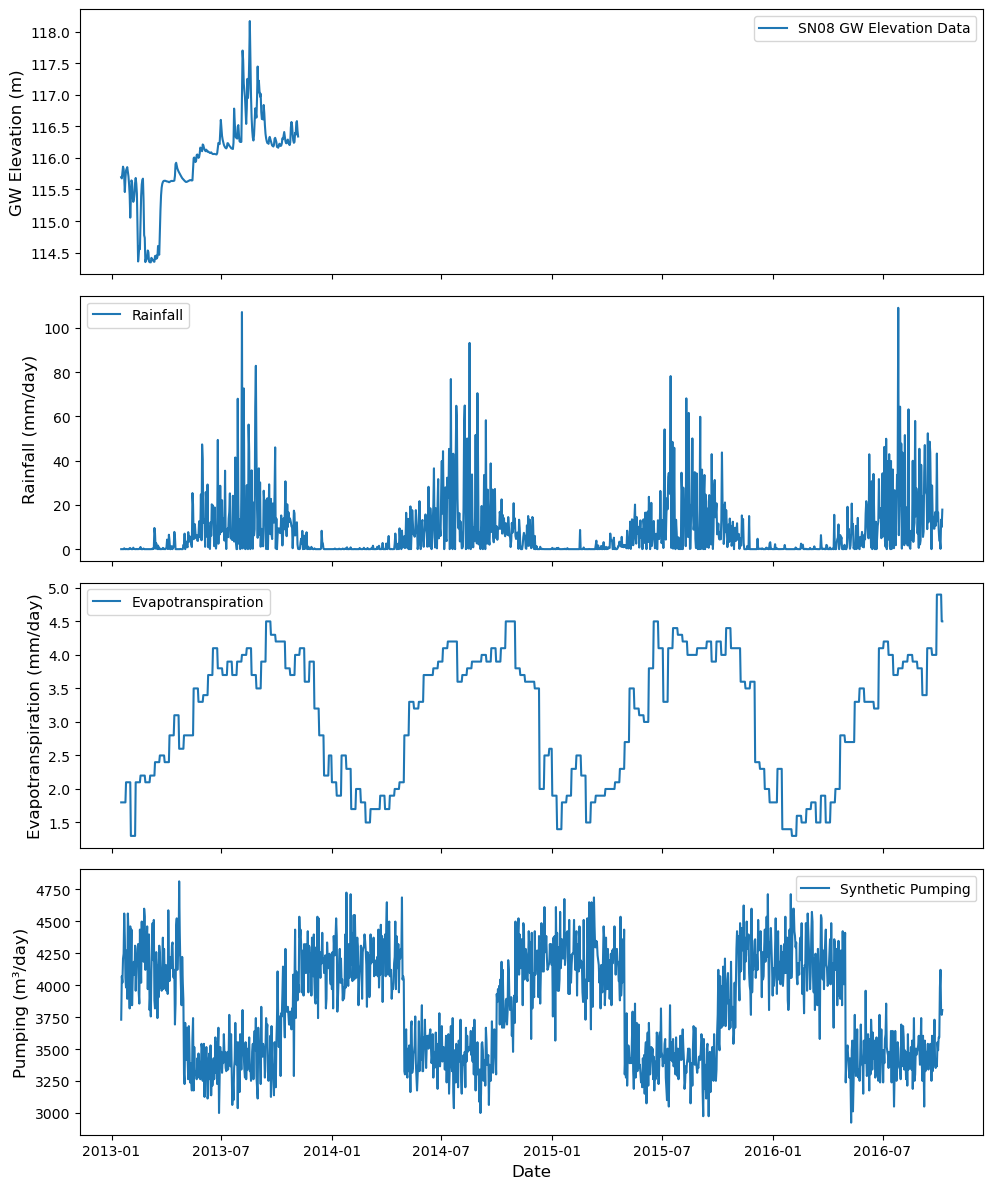

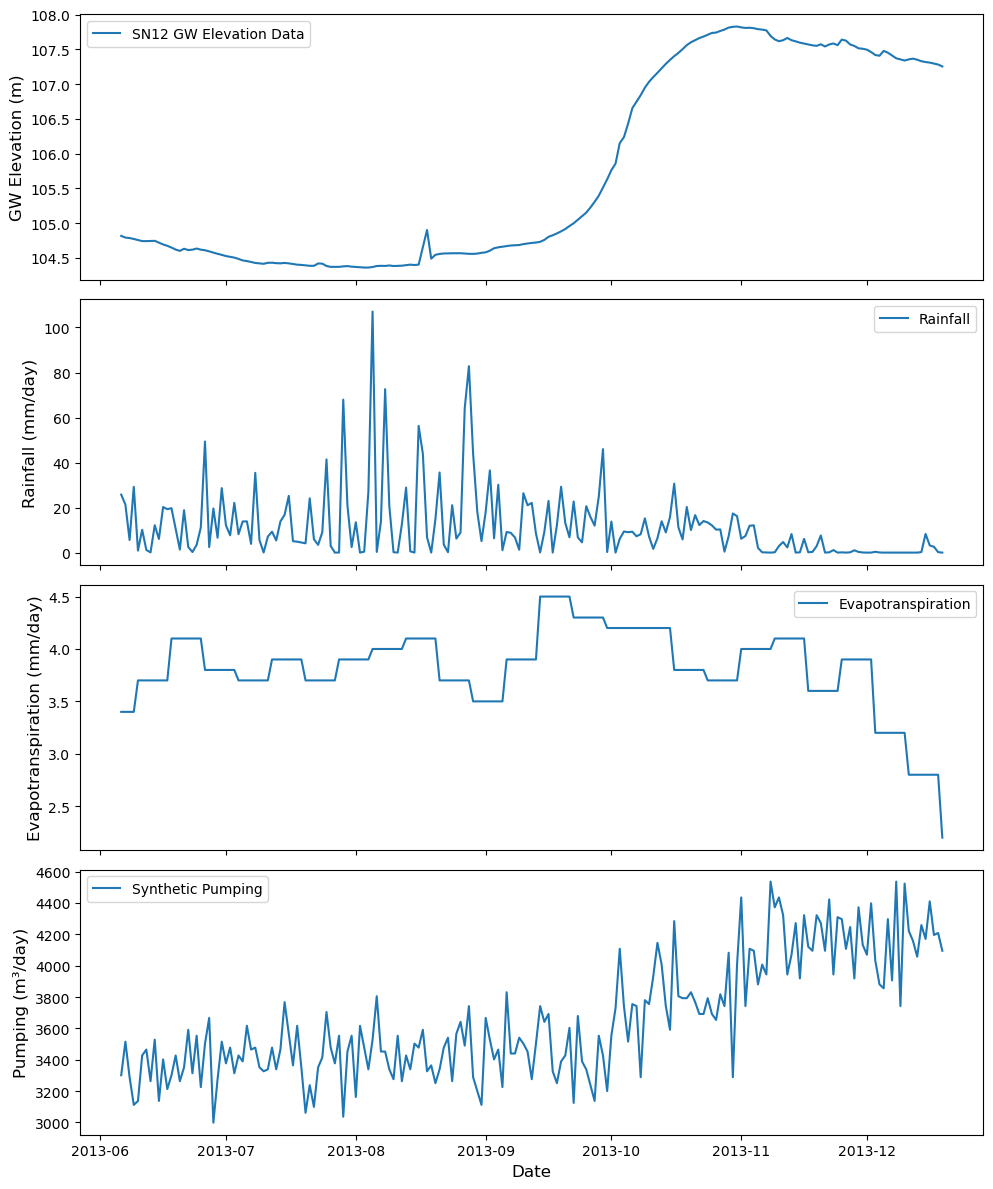

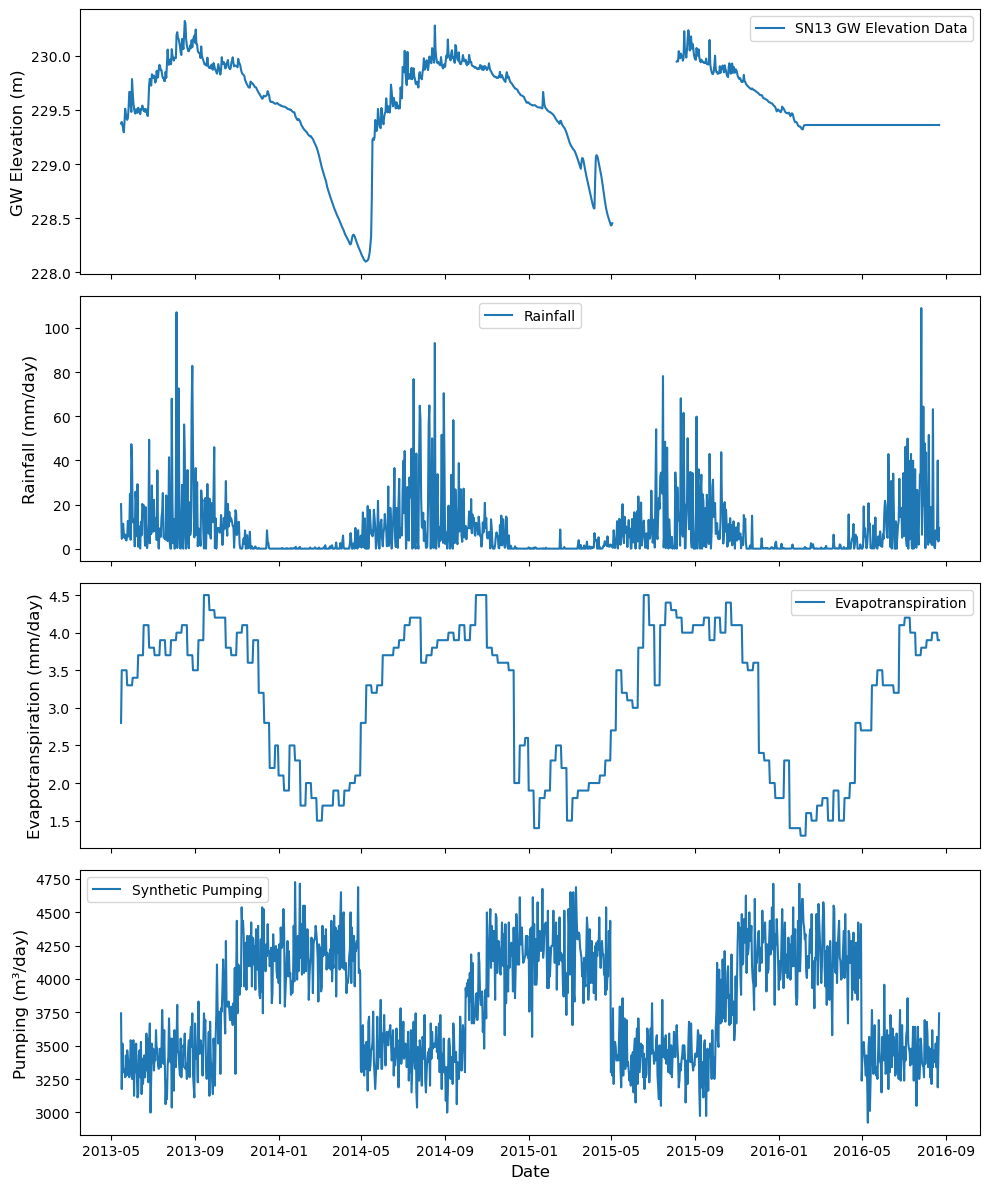

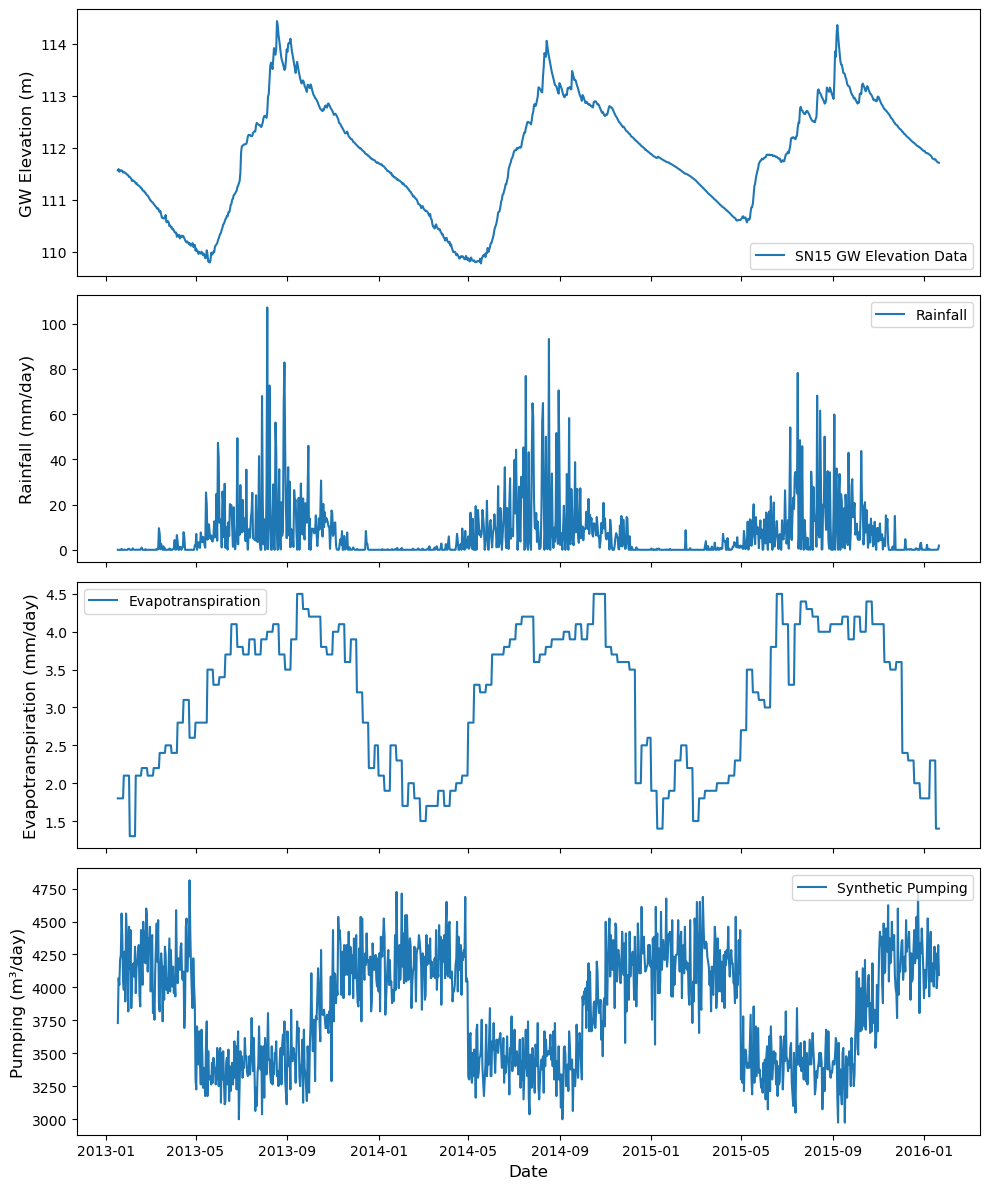

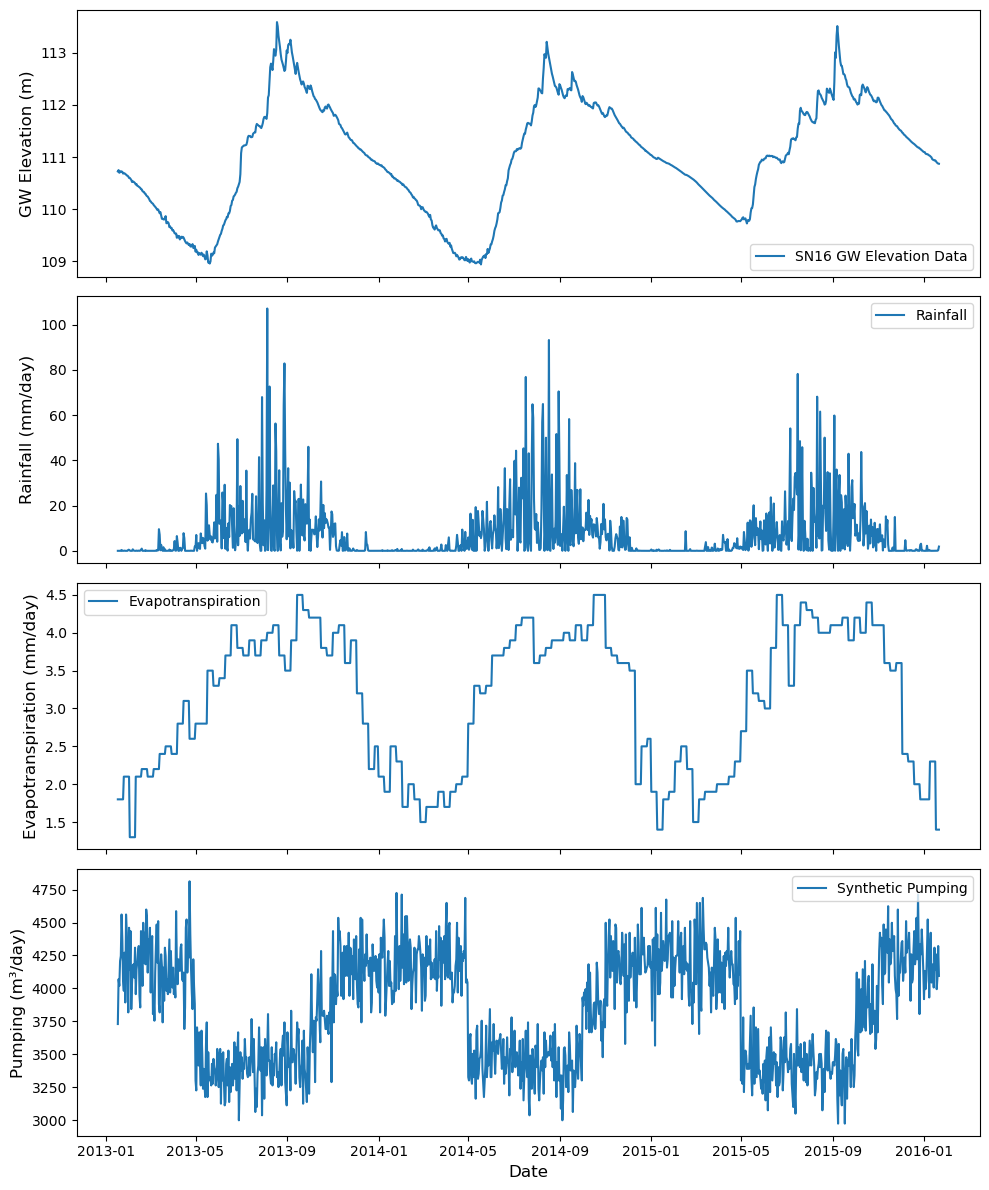

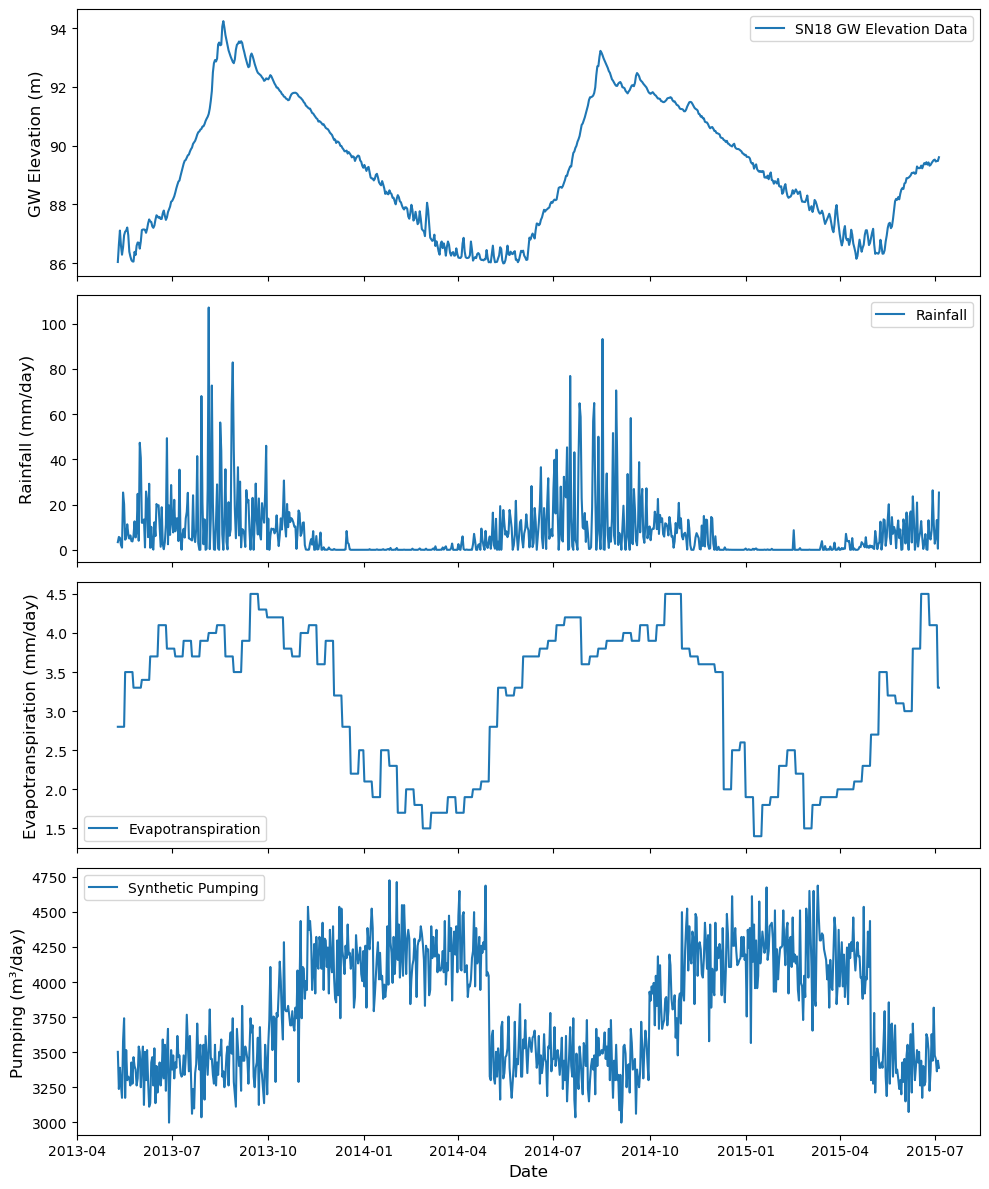

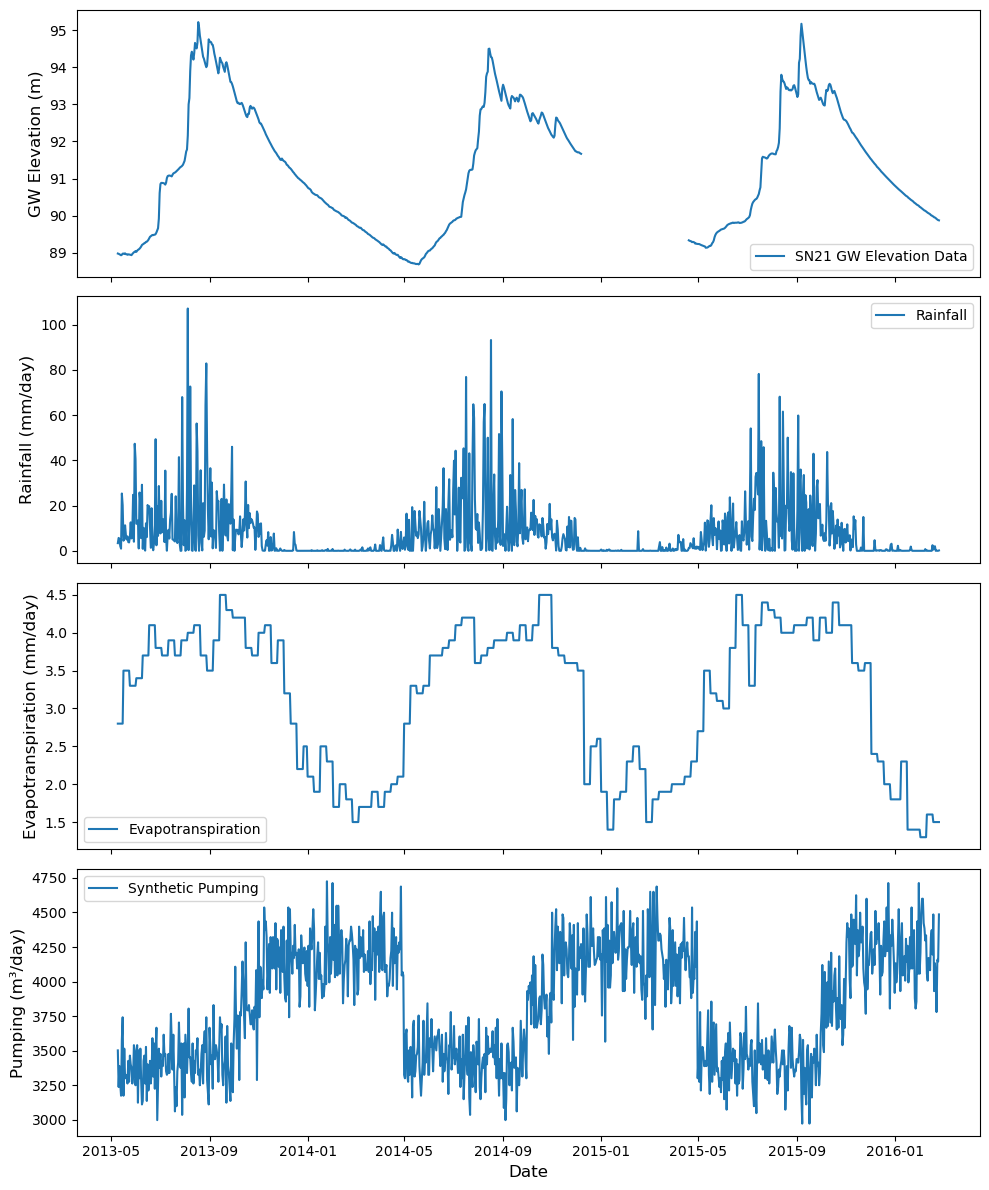

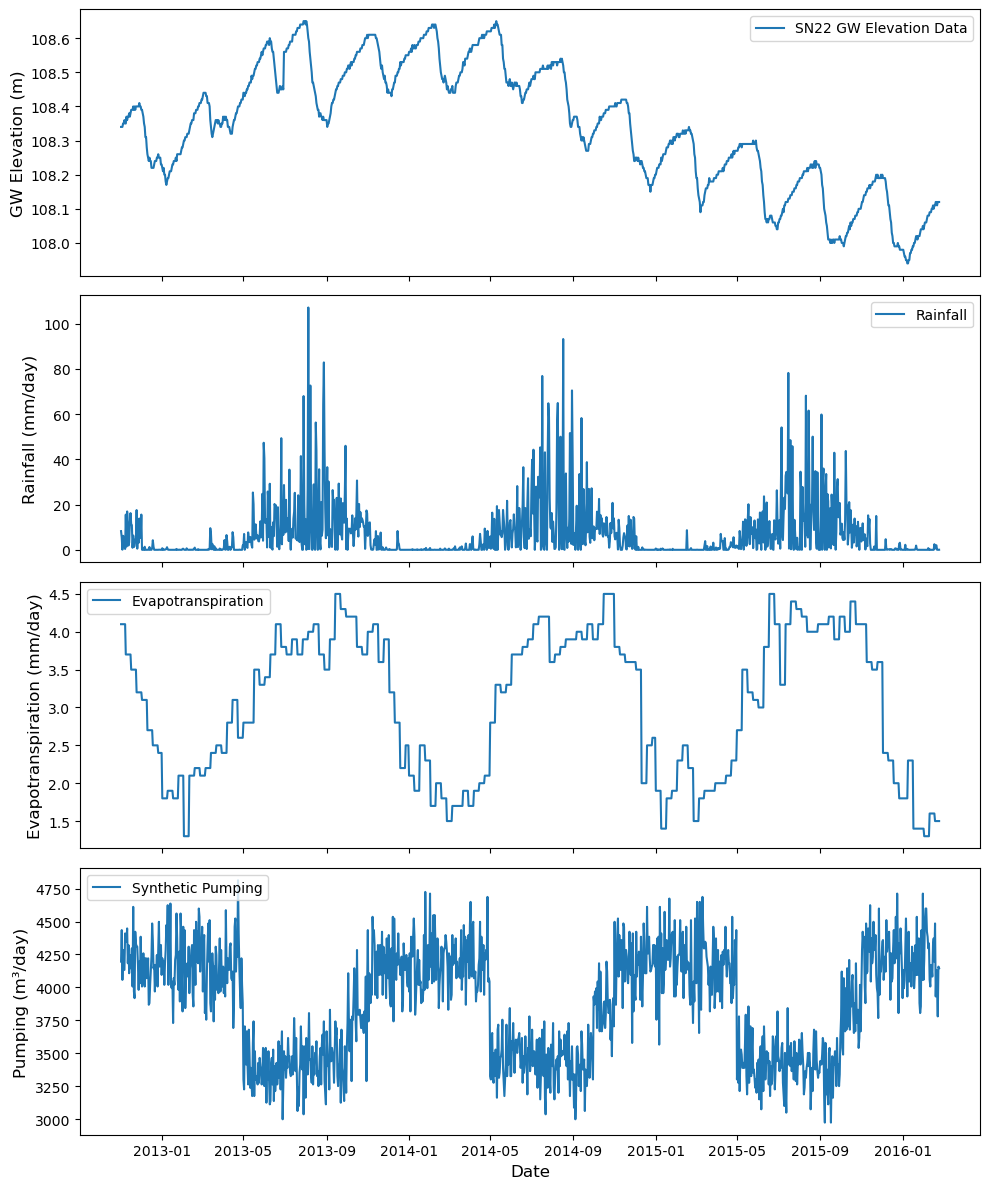

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

data_path = "E://DA//Datafiles_Sesay//"
names_obs_wells = ["SN01", "SN02", "SN03", "SN05", "SN08", "SN12", "SN13", "SN15", "SN16", "SN18", "SN21", "SN22"]

# Function to resample data to daily frequency
def resample_to_daily(df):
    return df.resample('D').mean()

# Load stressor data
rain = pd.read_csv(data_path + "Rain.csv", parse_dates=["Date"], index_col="Date").squeeze()
evap = pd.read_csv(data_path + "AET.csv", parse_dates=["Date"], index_col="Date").squeeze()
Pumping = pd.read_csv(data_path + "pumping.csv", parse_dates=["Date"], index_col="Date").squeeze()

# Reference elevations for each well
reference_elevations = {
    "SN01": 61.43, "SN02": 68.1, "SN03": 85.59, "SN05": 98.64, "SN08": 121.5, "SN12": 129.5,
    "SN13": 231.1, "SN15": 118.2, "SN16": 117.36, "SN18": 100.57, "SN21": 98.5, "SN22": 122.6
}

# Define font sizes
label_fontsize = 12
legend_fontsize = 10
tick_fontsize = 10

for well_name in names_obs_wells:
    try:
        # Load groundwater level data
        ho = pd.read_csv(data_path + well_name + "_WL.csv", parse_dates=["Date"], index_col="Date").squeeze()
        
        # Convert groundwater levels to elevations
        reference_elevation = reference_elevations[well_name]
        ho_elevation = reference_elevation - ho  # Convert depth to elevation
        
        # Determine the specific start and end dates for the well
        start_date = ho.index.min()
        end_date = ho.index.max()

        # Truncate stressor data to these dates
        rain_truncated = rain.truncate(before=start_date, after=end_date)
        evap_truncated = evap.truncate(before=start_date, after=end_date)
        Pumping_truncated = Pumping.truncate(before=start_date, after=end_date)

        # Resample data to daily frequency
        ho_elevation_daily = resample_to_daily(ho_elevation)
        rain_daily = resample_to_daily(rain_truncated)
        evap_daily = resample_to_daily(evap_truncated)
        Pumping_daily = resample_to_daily(Pumping_truncated)

        # Plotting
        fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

        axs[0].plot(ho_elevation_daily, label=f"{well_name} GW Elevation Data")
        axs[0].set_ylabel("GW Elevation (m)", fontsize=label_fontsize)
        axs[0].legend(fontsize=legend_fontsize)
        axs[0].tick_params(labelsize=tick_fontsize)

        axs[1].plot(rain_daily, label="Rainfall")
        axs[1].set_ylabel("Rainfall (mm/day)", fontsize=label_fontsize)
        axs[1].legend(fontsize=legend_fontsize)
        axs[1].tick_params(labelsize=tick_fontsize)

        axs[2].plot(evap_daily, label="Evapotranspiration")
        axs[2].set_ylabel("Evapotranspiration (mm/day)", fontsize=label_fontsize)
        axs[2].legend(fontsize=legend_fontsize)
        axs[2].tick_params(labelsize=tick_fontsize)

        axs[3].plot(Pumping_daily, label="Synthetic Pumping")
        axs[3].set_ylabel("Pumping (m³/day)", fontsize=label_fontsize)
        axs[3].legend(fontsize=legend_fontsize)
        axs[3].tick_params(labelsize=tick_fontsize)

        plt.xlabel("Date", fontsize=label_fontsize)
        plt.tight_layout()
        plt.savefig(data_path + f"{well_name}_figure_resampled_data.png", dpi=400)
        plt.show()

    except Exception as e:
        print(f"Error processing data for well {well_name}: {e}")



# `for`-Loop for Model Development, Calibration & scenario consideration for all stations 

# Three scenarios are considered: 1 Climate scenario 2. Pumping scenario 3. Combination of pumping and climate scenarios.

# Plot to compare baseline, climate, pumping  and Combination of the two scenarios   

Fit report WaterLevel_m                Fit Statistics
nfev    39                     EVP              69.54
nobs    613                    R2                0.69
noise   True                   RMSE              1.24
tmin    2013-02-22 00:00:00    AIC           -1973.21
tmax    2016-01-18 00:00:00    BIC           -1933.45
freq    D                      Obj              11.90
warmup  3650 days 00:00:00     ___                   
solver  LeastSquares           Interp.             No

Parameters (9 optimized)
               optimal       stderr     initial  vary
Pumping_A    -0.037619      ±53.12%   -0.030936  True
Pumping_a    32.662089     ±127.00%  100.000000  True
Pumping_b     3.179337     ±237.09%    1.000000  True
Recharge_A    0.126008      ±18.28%    0.086367  True
Recharge_n    2.606811      ±10.10%    1.000000  True
Recharge_a    3.247717      ±18.94%   10.000000  True
Recharge_f   -0.001166  ±191332.82%   -1.000000  True
constant_d   60.651667      ±10.77%   50.559254  True
no

Fit report WaterLevel_m              Fit Statistics
nfev    38                     EVP            86.55
nobs    1100                   R2              0.86
noise   True                   RMSE            0.40
tmin    2013-01-17 00:00:00    AIC         -6363.70
tmax    2016-01-21 00:00:00    BIC         -6318.67
freq    D                      Obj             1.66
warmup  3650 days 00:00:00     ___                 
solver  LeastSquares           Interp.           No

Parameters (9 optimized)
                optimal    stderr     initial  vary
Pumping_A     -0.058547   ±37.76%   -0.030936  True
Pumping_a    138.827005   ±90.98%  100.000000  True
Pumping_b      0.428178  ±124.14%    1.000000  True
Recharge_A     0.048026   ±17.11%    0.086367  True
Recharge_n     1.824602    ±5.03%    1.000000  True
Recharge_a     5.418950   ±16.01%   10.000000  True
Recharge_f    -1.725271   ±86.12%   -1.000000  True
constant_d   129.591852    ±5.12%  111.839024  True
noise_alpha   98.811782   ±42.87%    1

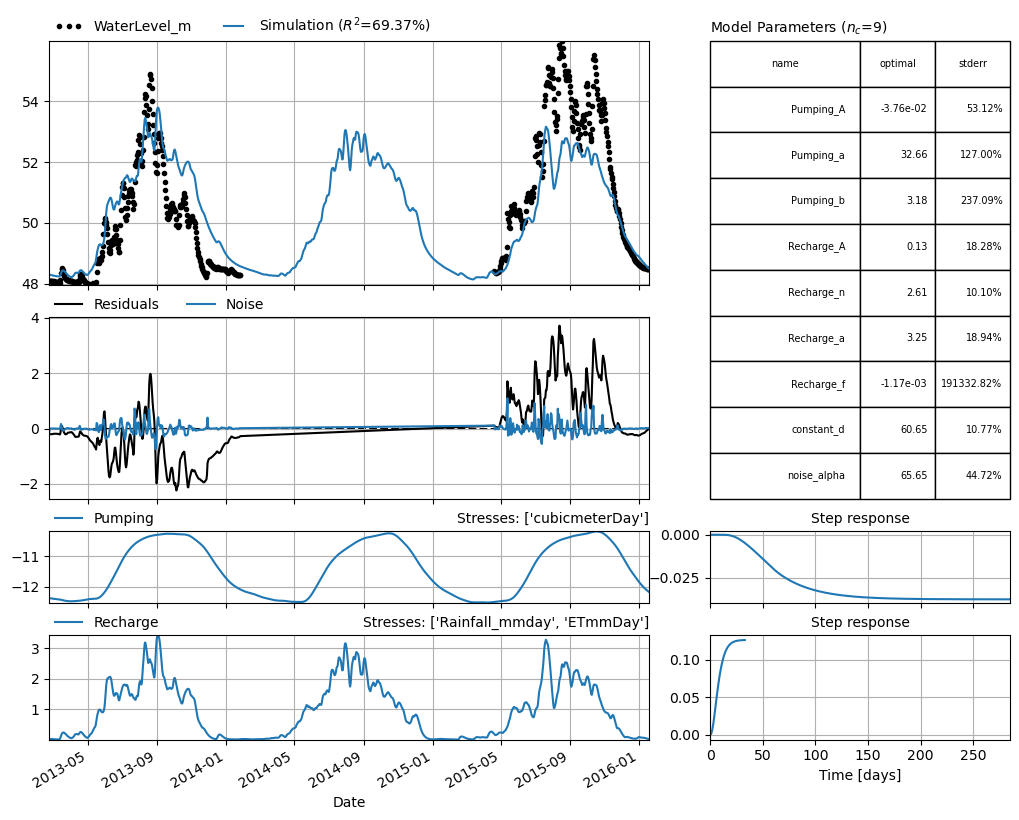

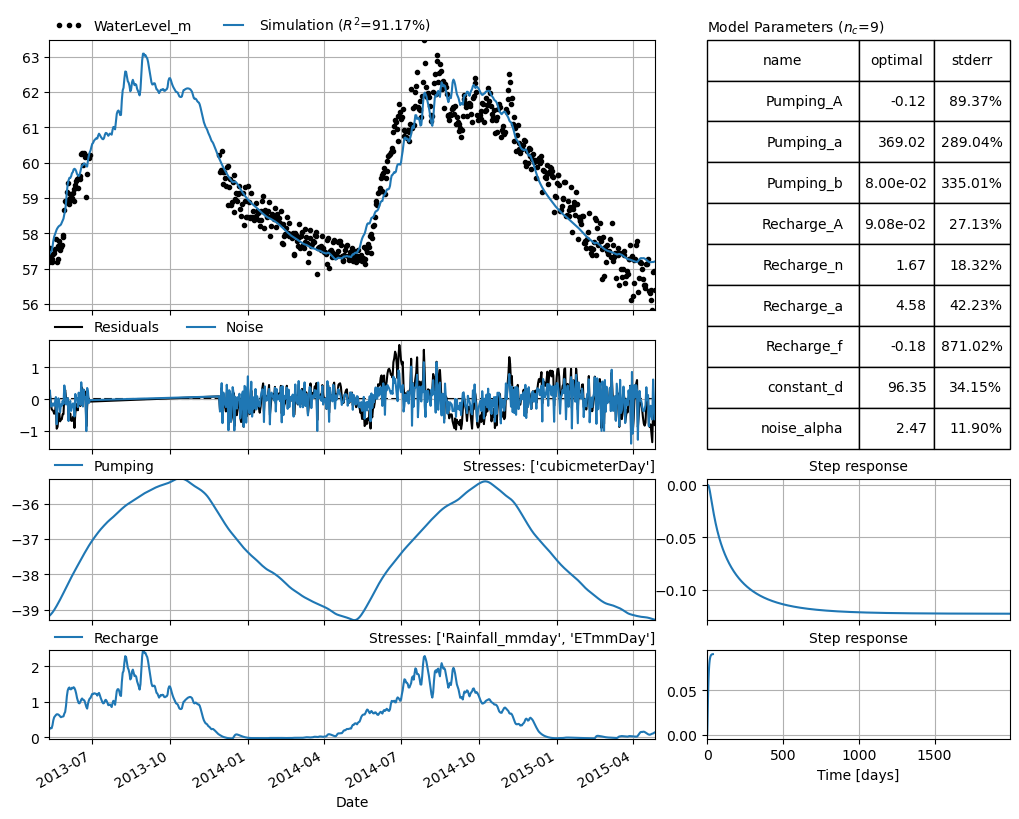

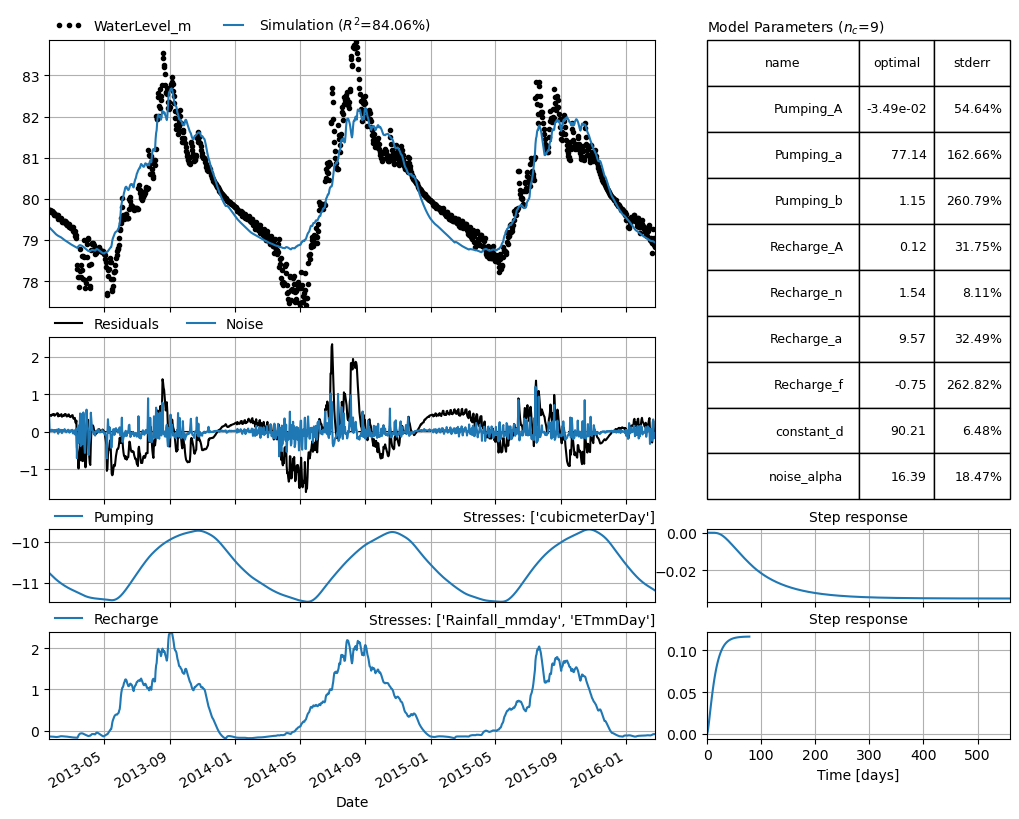

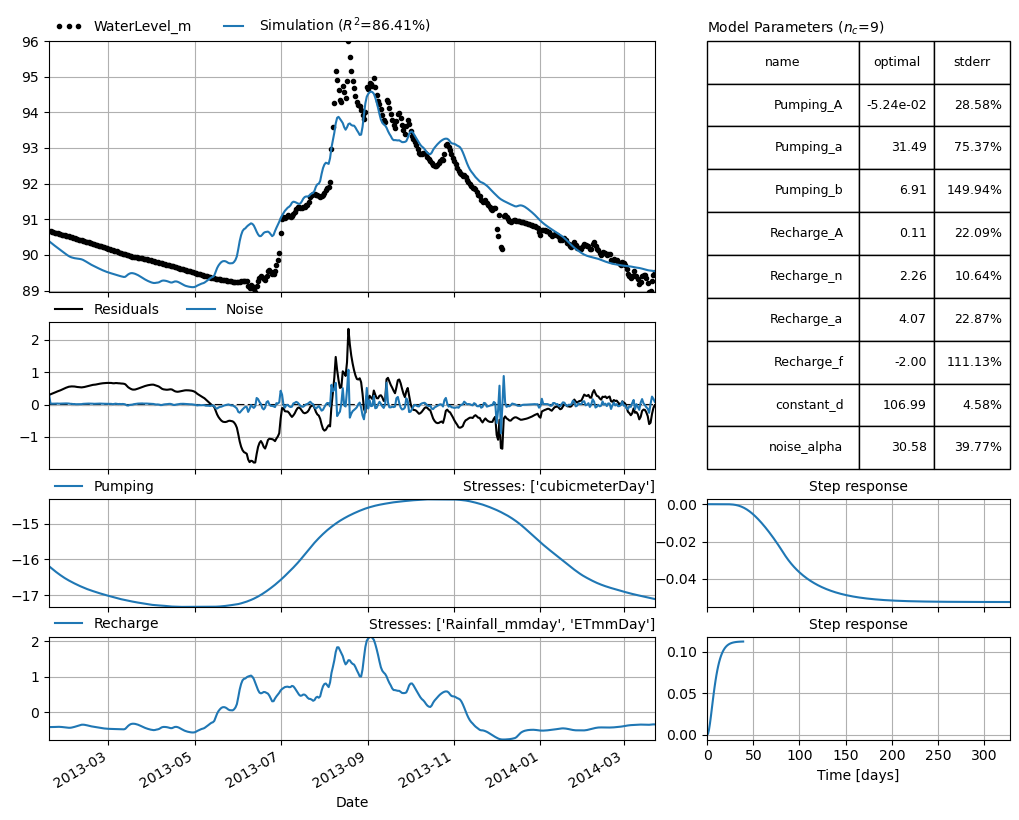

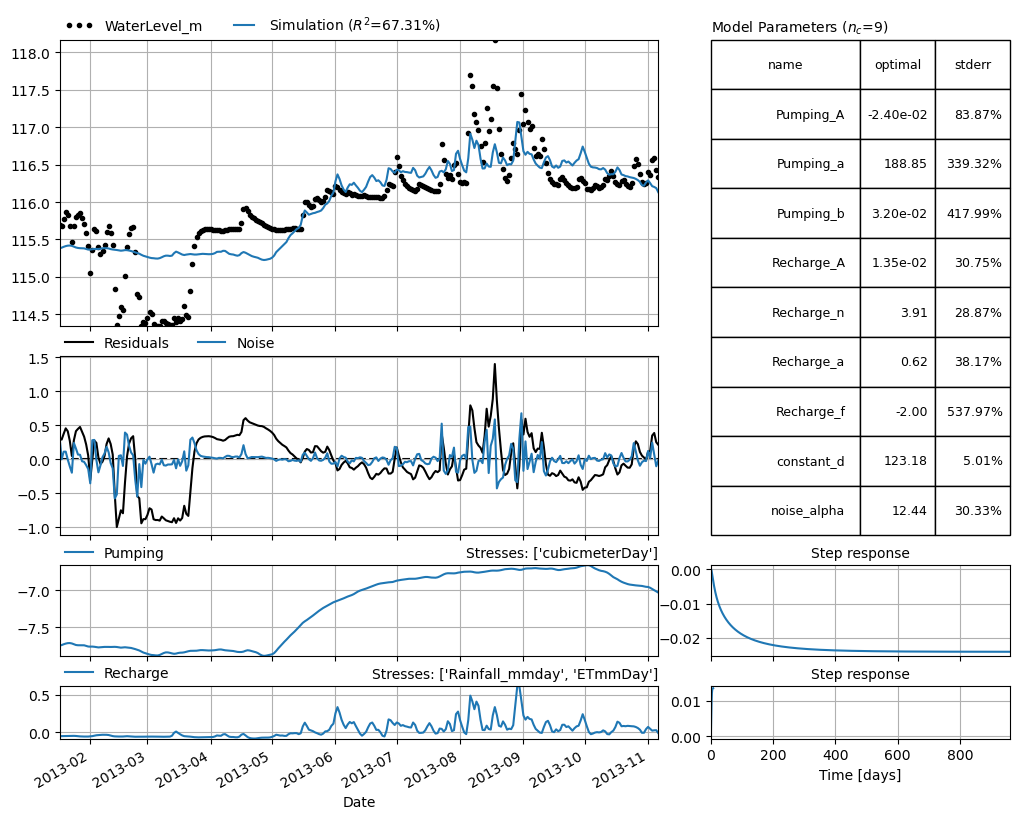

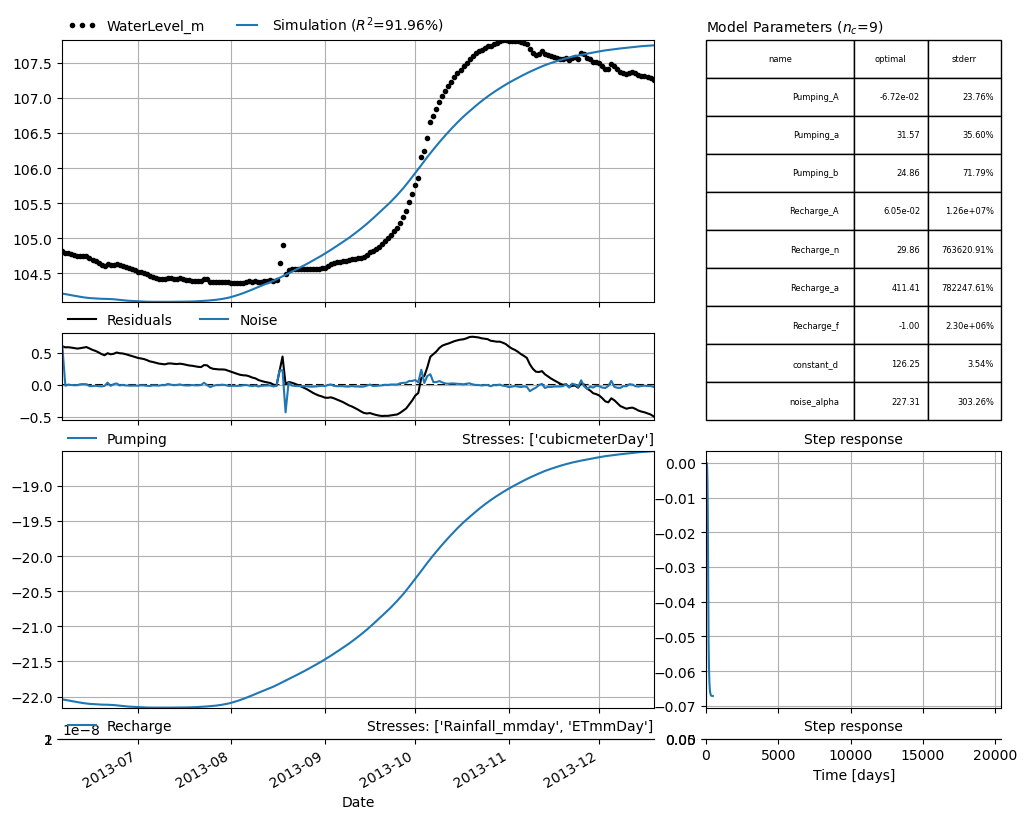

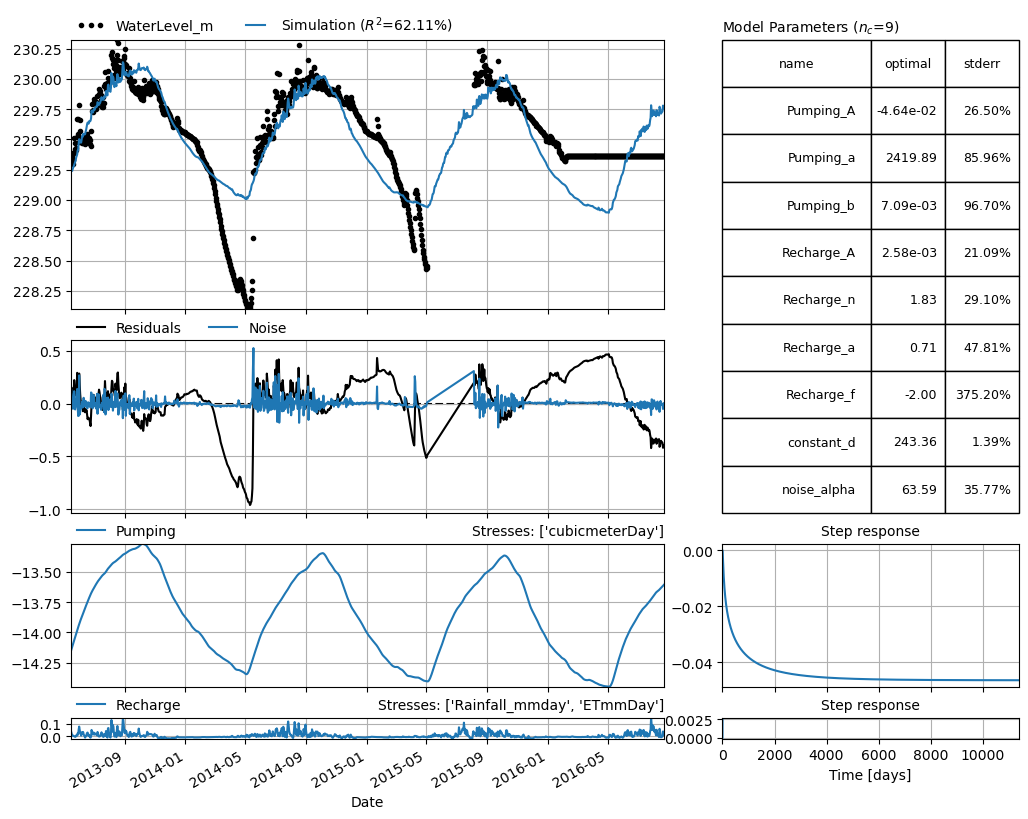

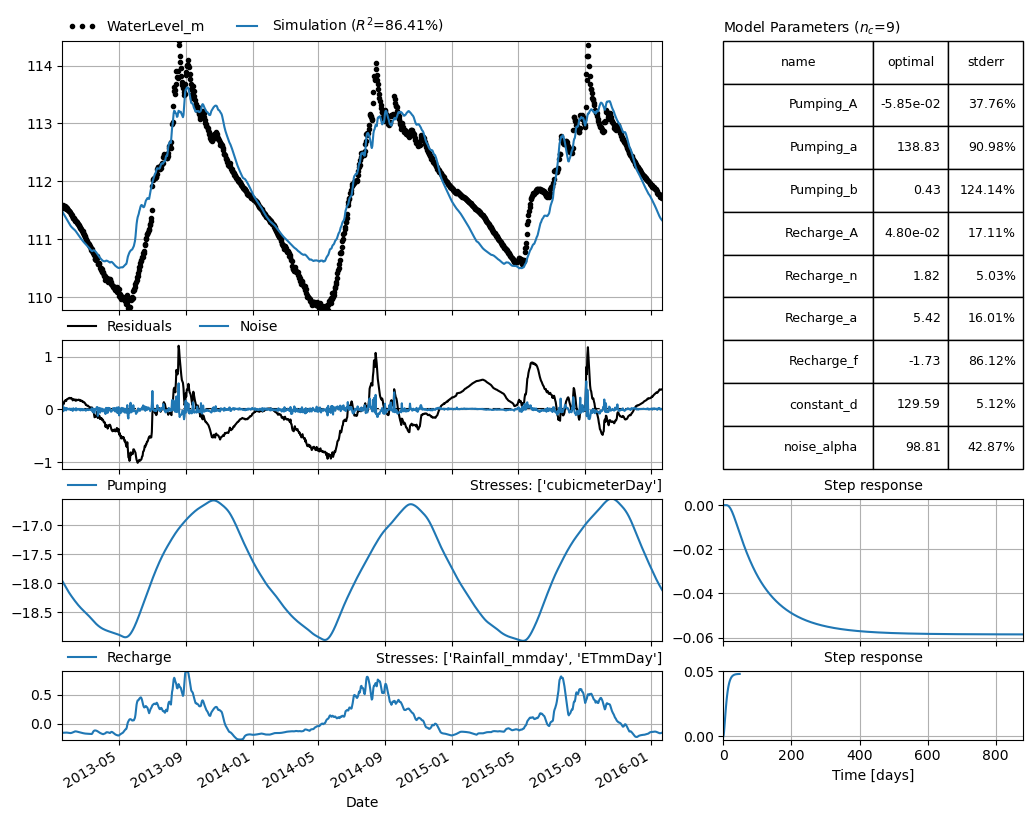

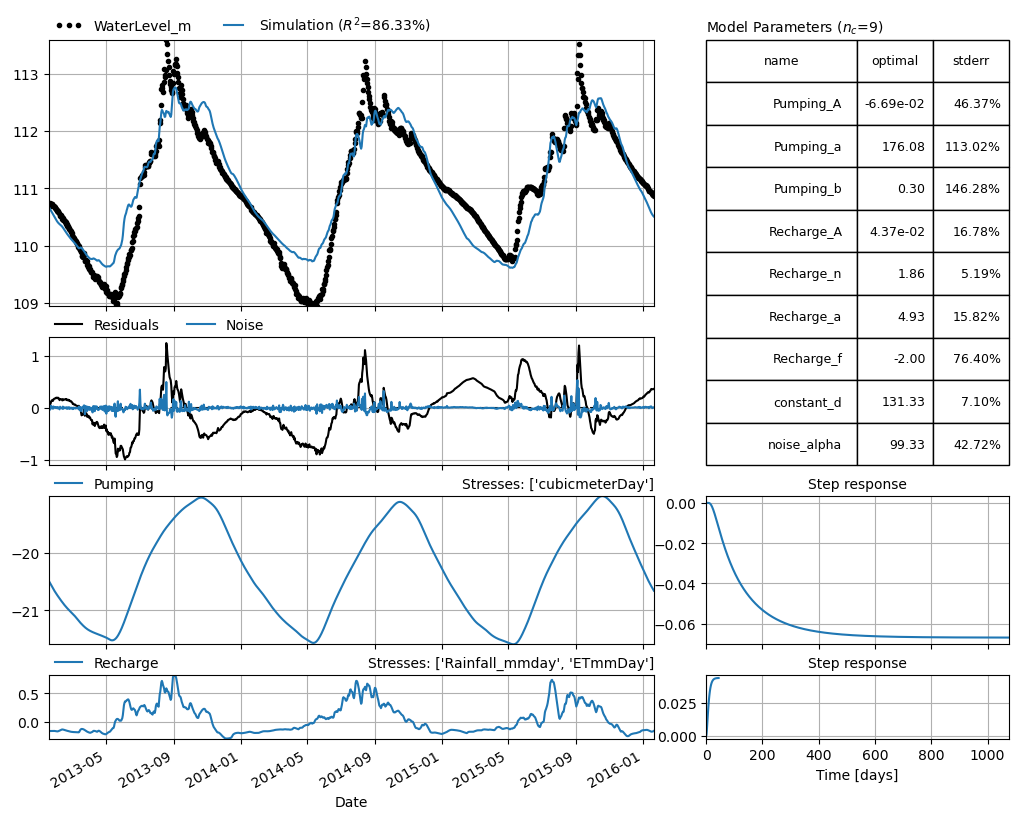

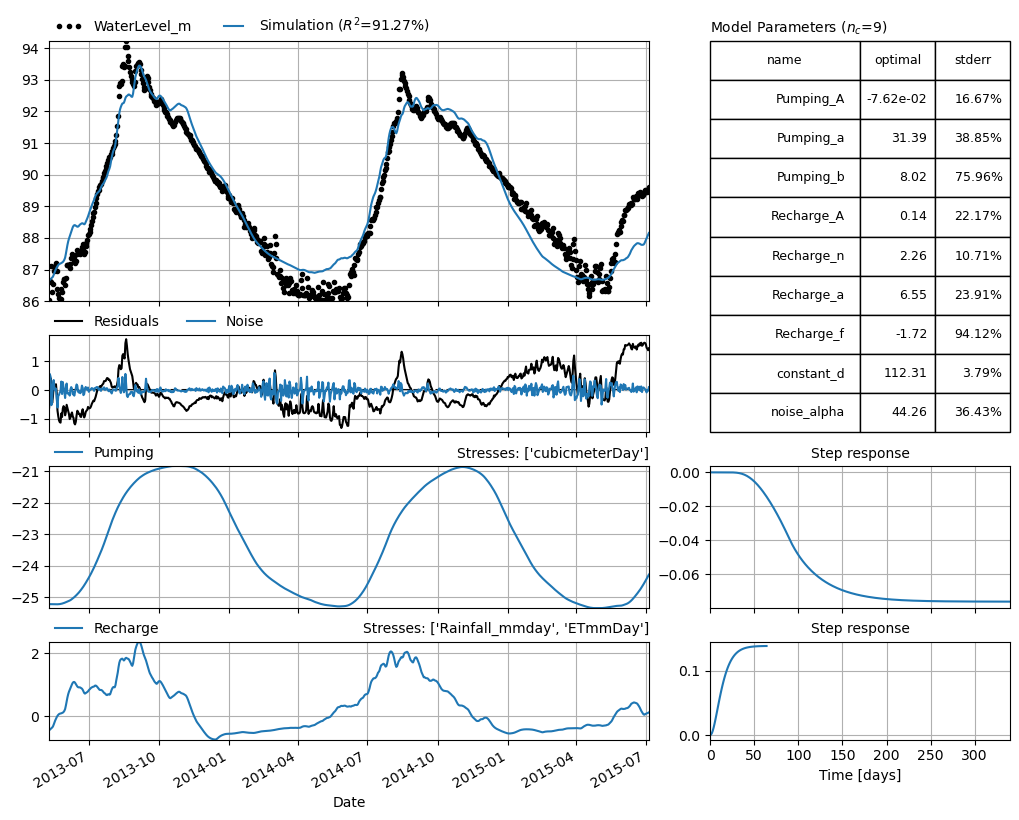

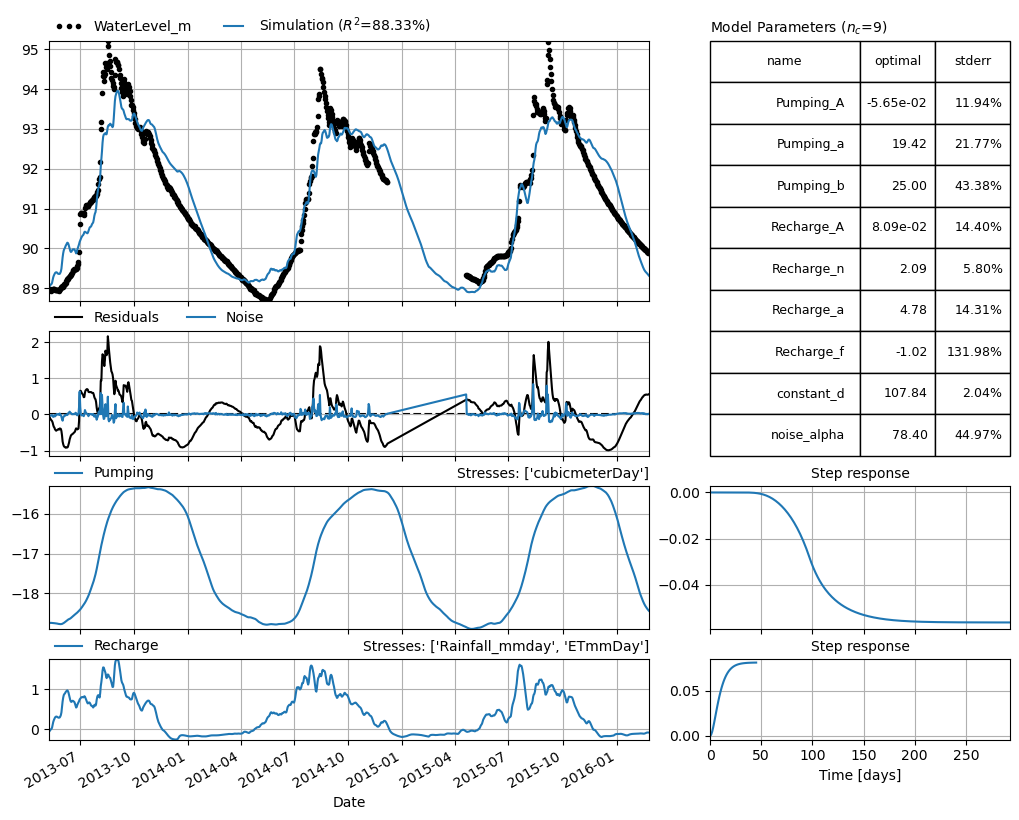

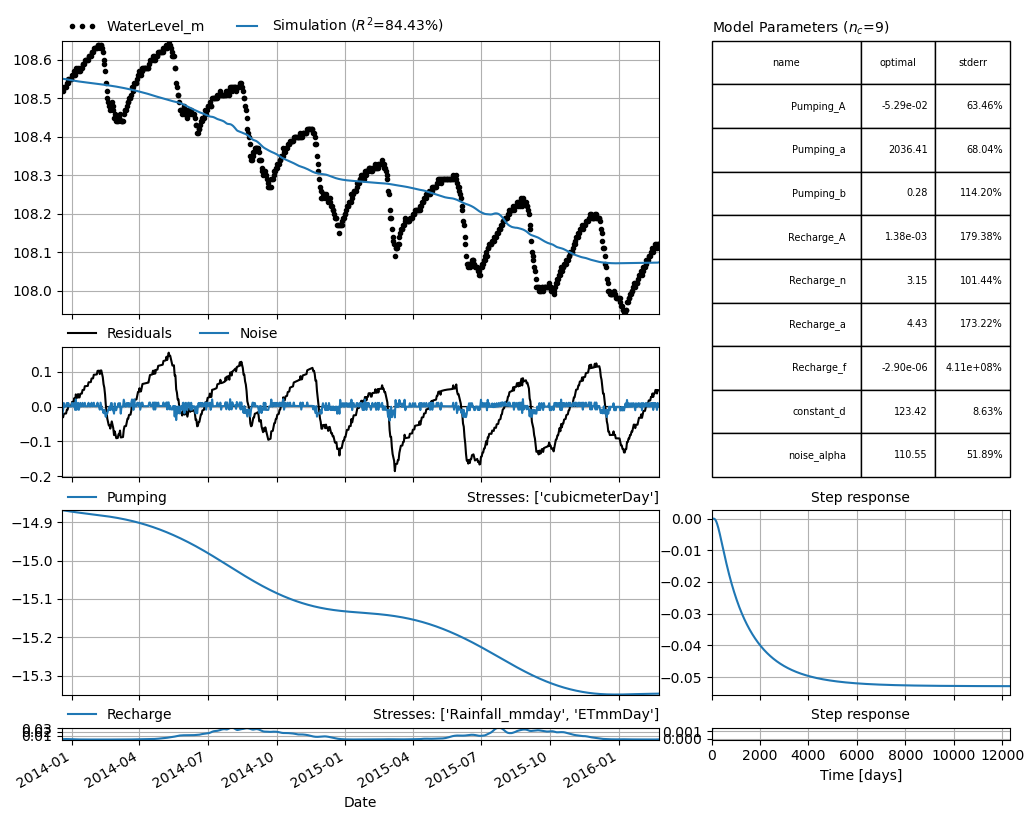

In [19]:
# import all necessary libraries 
import pandas as pd
import pastas as ps
import numpy as np
import matplotlib.pyplot as plt


# Observation well names and their corresponding start and end dates for analysis
names_obs_wells = ["SN01", "SN02", "SN03", "SN05", "SN08", "SN12", "SN13", "SN15", "SN16", "SN18", "SN21", "SN22"]
# Convert Groundwater depth(measured from the top of the casing to GWL) 
# Groundwater elevation which is  realative to mean sea level 
reference_elevations = {"SN01": 61.43, "SN02": 68.1, "SN03": 85.59, "SN05": 98.64, "SN08": 121.5, "SN12": 129.5, 
                        "SN13": 231.1, "SN15": 118.2, "SN16": 117.36, "SN18": 100.57, "SN21": 98.5, "SN22" : 122.6}

common_starting_dates = ["2013-02-22", "2013-05-11", "2013-01-18", "2013-01-18", "2013-01-17", "2013-06-06", 
                        "2013-05-16", "2013-01-17", "2013-01-17", "2013-05-10", "2013-05-10", "2013-12-19"]

common_ending_dates = ["2016-01-18", "2015-04-27", "2016-02-24", "2014-03-23", "2016-10-08", "2013-12-19", 
                       "2016-08-22", "2016-01-21", "2016-01-21", "2015-07-05", "2016-02-25", "2016-02-25"]

# Input data path
#data_path = "E://Datafiles_Sesay//Input//"
data_path = "E://DA//Datafiles_Sesay//Input//"


# Loop through each observation well
for i in range(len(names_obs_wells)):
    well_name = names_obs_wells[i]
    common_start_date = common_starting_dates[i]
    common_end_date = common_ending_dates[i]

    # SECTION 1: LOAD DATA
    # --------------------
    # Load groundwater level data
    gw_depth = pd.read_csv(f'{data_path}{well_name}_wl.csv', parse_dates=["Date"], index_col="Date").squeeze()
    # point of measurement(top of casing) ie elevation 
    ref_elev = reference_elevations.get(well_name, 0) 
    ho = ref_elev - gw_depth

    # Load rainfall data
    rain = pd.read_csv(f'{data_path}{well_name}_rain.csv', parse_dates=["Date"], index_col="Date").squeeze()

    # Load evaporation data
    evap = pd.read_csv(f'{data_path}{well_name}_AET.csv', parse_dates=["Date"], index_col="Date").squeeze()

    # Load synthetic pumping data
    Pumping = pd.read_csv(f'{data_path}{well_name}_Pumping.csv', parse_dates=["Date"], index_col="Date").squeeze().astype(float)


    # SECTION 2: DATA PREPARATION / PRE-PROCESSING
    # --------------------------------------------
    ho_truncated = ho.truncate(before=common_start_date, after=common_end_date)
    rain_truncated = rain.truncate(before=common_start_date, after=common_end_date)
    evap_truncated = evap.truncate(before=common_start_date, after=common_end_date)
    Pumping_truncated = Pumping.truncate(before=common_start_date, after=common_end_date)

    # Resample to daily frequency
    ho_daily = ho_truncated.resample('D').mean()

    # SECTION 4: MODEL SETUP (BASELINE SCENARIO)
    # -------------------------------------------
    
    # Setup the pastas Model with the daily data
    ml = ps.Model(ho_daily)

    # Define response functions for the stress models
    gamma_recharge = ps.Gamma(name="gamma_rain")
    hantush_pumping = ps.Hantush(name="hantush_pumping")

  
    # Define response functions for the stress models
    gamma_recharge_scenario = ps.Gamma(name="gamma_rain")
    hantush_pumping = ps.Hantush(name="hantush_pumping")
    
    # Define stress models with response functions
    pumping_model = ps.StressModel(Pumping, name="Pumping", rfunc=hantush_pumping, settings="prec", up=False)
    recharge_model = ps.RechargeModel(prec=rain, evap=evap, rfunc=gamma_recharge_scenario, name="Recharge")

    
    # Add stress models to the PASTAS Model
    ml.add_stressmodel(pumping_model)
    ml.add_stressmodel(recharge_model)
    
    # Solve the model
    ml.solve(report=True)
    ml.plots.results()
    
    
    # store parameter values
    calibrated_parameters = ml.get_parameters()
    
    # simulate the model
    sim_baseline = ml.simulate(p=calibrated_parameters)
    
    # store the simulation results in csv-file
    #sim_baseline.to_csv("E://Datafiles_Sesay//Output//{}_baseline.csv".format(names_obs_wells[i]))
    sim_baseline.to_csv("E://DA//Datafiles_Sesay//Output//{}_baseline.csv".format(names_obs_wells[i]))
    

    # SECTION 4: Scenario Analysis
    
  
    # Scenario 1 (Climate scenario): Decrease rainfall and increase evapotranspiration by 10%, pumping remains the same
    rain_scenario_1 = rain_truncated * 0.9
    evap_scenario_1 = evap_truncated * 1.1
    pumping_scenario_1 = Pumping_truncated

    # Scenario 2(Pumping Scenario): Increase pumping by 30%, rainfall and evapotranspiration remain the same
    rain_scenario_2 = rain_truncated
    evap_scenario_2 = evap_truncated
    pumping_scenario_2 = Pumping_truncated * 1.5

    # Scenario 3 (combined scenario): Decrease rainfall by 10%, increase evapotranspiration by 10%, and increase pumping by 30%
    rain_scenario_3 = rain_truncated * 0.9
    evap_scenario_3 = evap_truncated * 1.1
    pumping_scenario_3 = Pumping_truncated * 1.5

    scenarios = [
        (rain_scenario_1, evap_scenario_1, pumping_scenario_1),
        (rain_scenario_2, evap_scenario_2, pumping_scenario_2),
        (rain_scenario_3, evap_scenario_3, pumping_scenario_3)
    ]

    for number, scenario in enumerate(scenarios):
        # get rain, evaporation, and pumping for the scenario
        rain_scenario = scenario[0]
        evap_scenario = scenario[1]
        pumping_scenario = scenario[2]

        # model setup for each scenario
        gamma_recharge_scenario = ps.Gamma(name="gamma_rain")
        hantush_pumping_scenario = ps.Hantush(name="hantush_pumping")
        
        recharge_model_scenario = ps.RechargeModel(prec=rain_scenario, evap=evap_scenario, 
                                                   rfunc=gamma_recharge_scenario, name="Recharge")
    
        pumping_model_scenario = ps.StressModel(pumping_scenario, name="Pumping", 
                                                rfunc=hantush_pumping_scenario, settings="prec", up=False)
        
        ml.add_stressmodel(pumping_model_scenario, replace=True)
        ml.add_stressmodel(recharge_model_scenario, replace=True)
    
        # solve the model for each scenario
        #ml.solve(report=True)
        #ml.plots.results()
        # simulate the model
        plt.savefig(f"{data_path}all_wells_GWE_raw_data.png", dpi=400)

        # store the simulation results in csv-file
        sim_scenario = ml.simulate(p=calibrated_parameters)
        sim_scenario.to_csv(f"E://DA//Datafiles_Sesay//Output//{names_obs_wells[i]}_scenario{number + 1}.csv")

# Plot to compare baseline, climate, pumping and Combination of the two scenarios

SN01 - Scenario 1 Difference:
Mean Regular Difference: 0.03 m
SN01 - Scenario 2 Difference:
Mean Regular Difference: 5.61 m
SN01 - Scenario 3 Difference:
Mean Regular Difference: 5.70 m


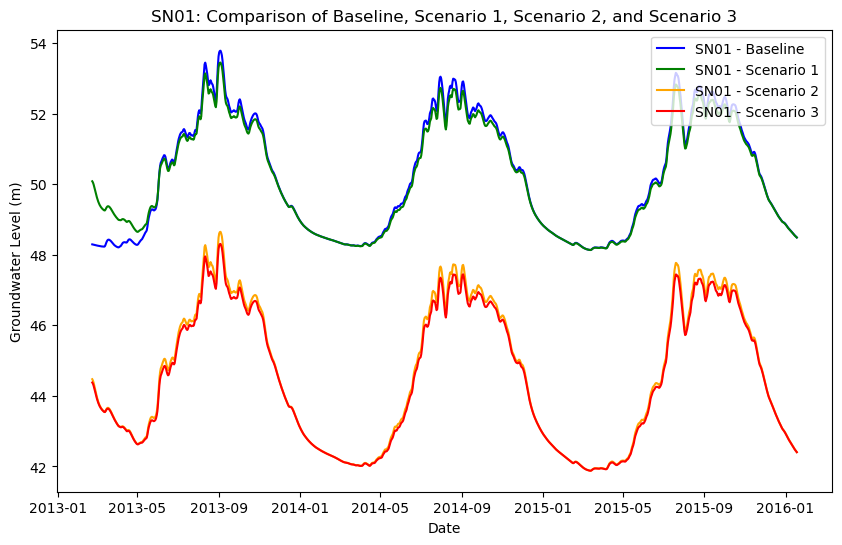

SN02 - Scenario 1 Difference:
Mean Regular Difference: -0.22 m
SN02 - Scenario 2 Difference:
Mean Regular Difference: 18.21 m
SN02 - Scenario 3 Difference:
Mean Regular Difference: 18.28 m


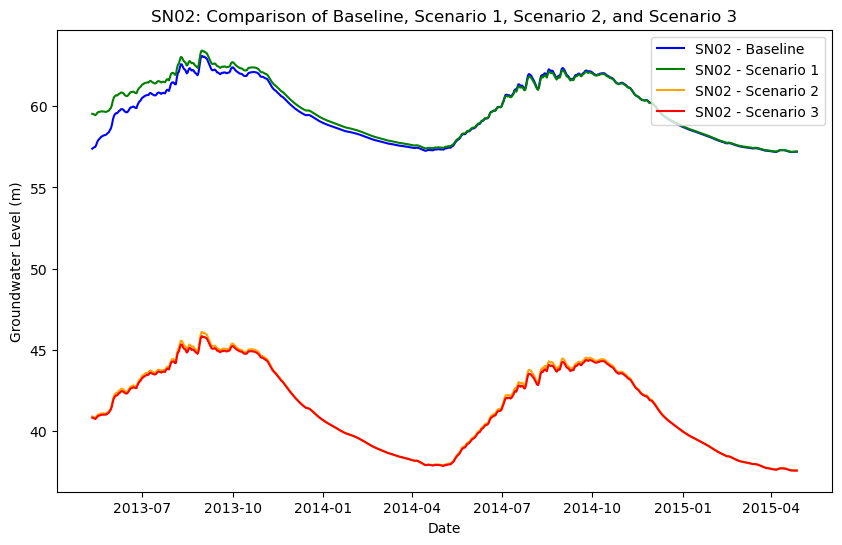

SN03 - Scenario 1 Difference:
Mean Regular Difference: 0.07 m
SN03 - Scenario 2 Difference:
Mean Regular Difference: 5.26 m
SN03 - Scenario 3 Difference:
Mean Regular Difference: 5.37 m


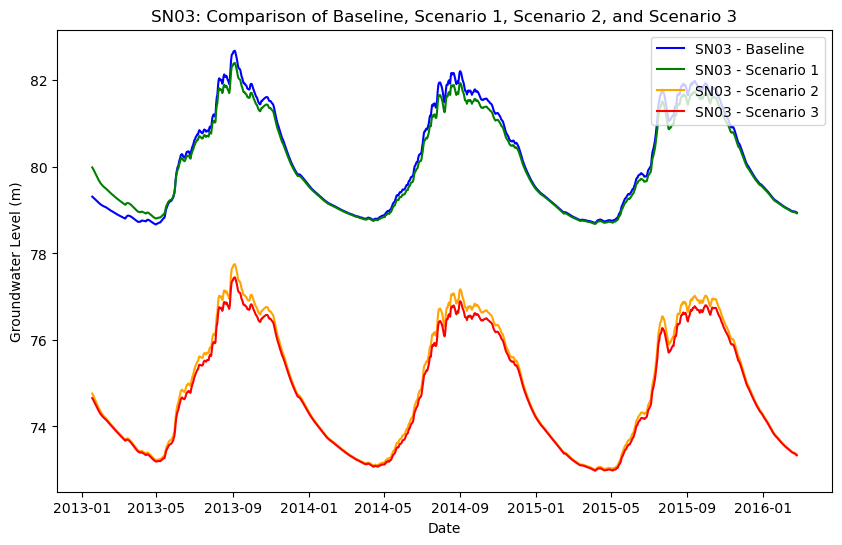

SN05 - Scenario 1 Difference:
Mean Regular Difference: -0.04 m
SN05 - Scenario 2 Difference:
Mean Regular Difference: 7.73 m
SN05 - Scenario 3 Difference:
Mean Regular Difference: 7.87 m


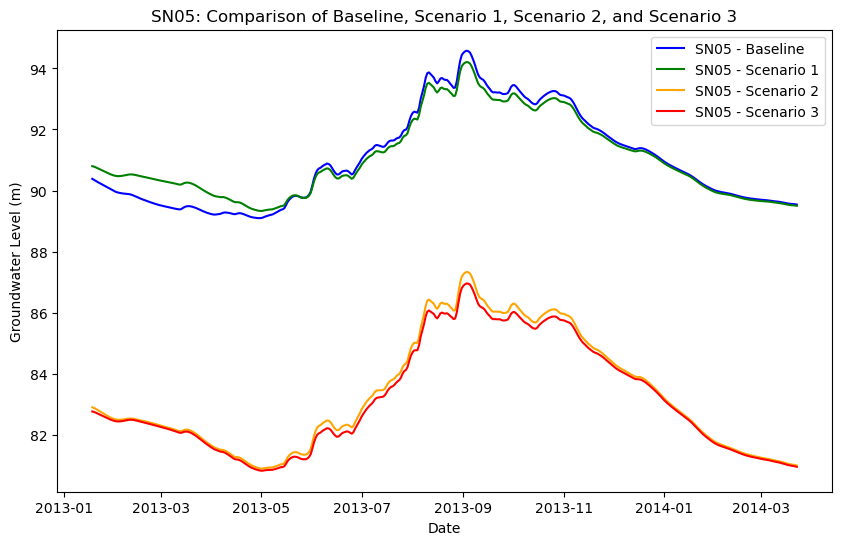

SN08 - Scenario 1 Difference:
Mean Regular Difference: -0.05 m
SN08 - Scenario 2 Difference:
Mean Regular Difference: 3.52 m
SN08 - Scenario 3 Difference:
Mean Regular Difference: 3.54 m


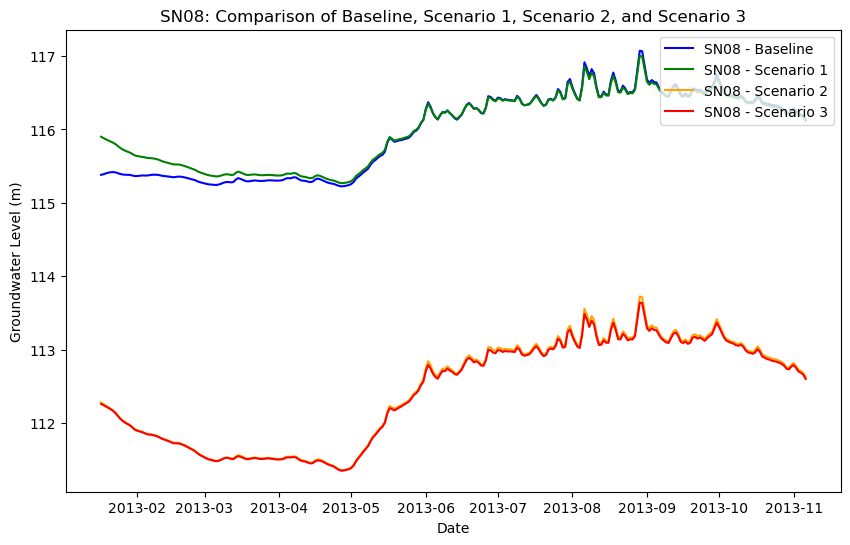

SN12 - Scenario 1 Difference:
Mean Regular Difference: -1.45 m
SN12 - Scenario 2 Difference:
Mean Regular Difference: 8.15 m
SN12 - Scenario 3 Difference:
Mean Regular Difference: 8.15 m


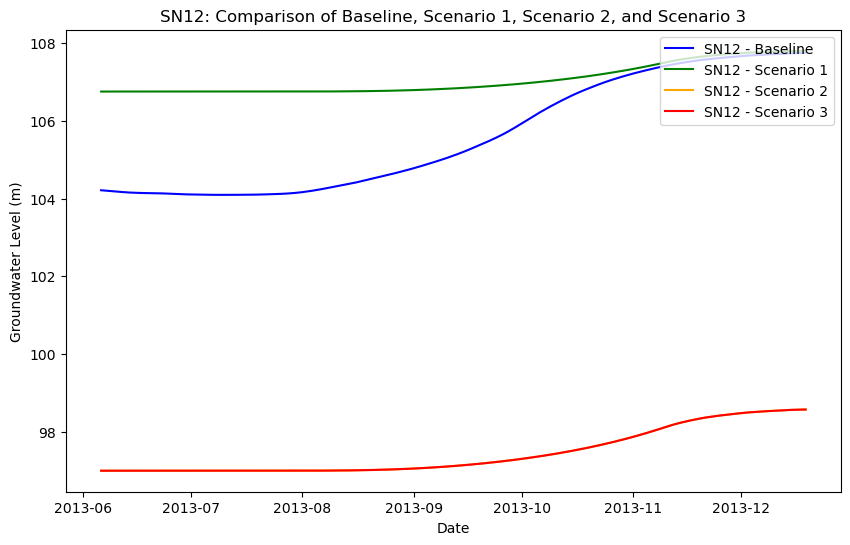

SN13 - Scenario 1 Difference:
Mean Regular Difference: -0.09 m
SN13 - Scenario 2 Difference:
Mean Regular Difference: 6.80 m
SN13 - Scenario 3 Difference:
Mean Regular Difference: 6.80 m


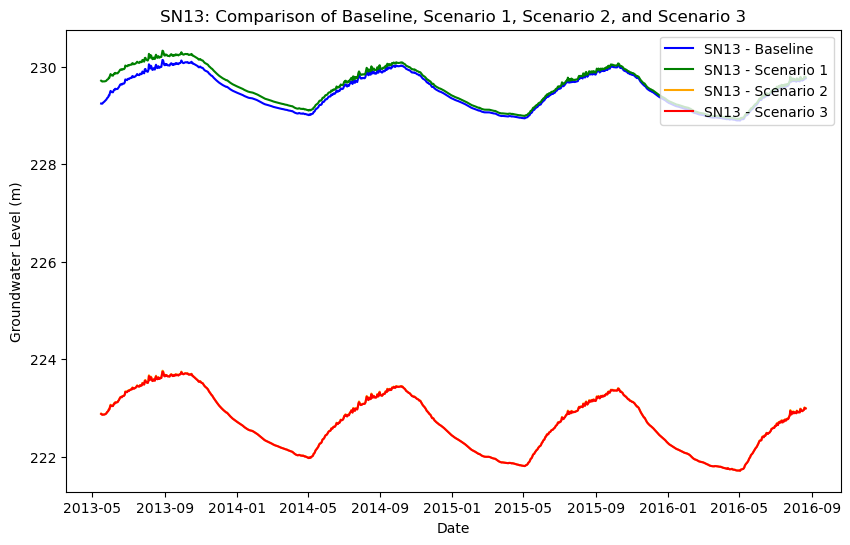

SN15 - Scenario 1 Difference:
Mean Regular Difference: 0.01 m
SN15 - Scenario 2 Difference:
Mean Regular Difference: 8.83 m
SN15 - Scenario 3 Difference:
Mean Regular Difference: 8.89 m


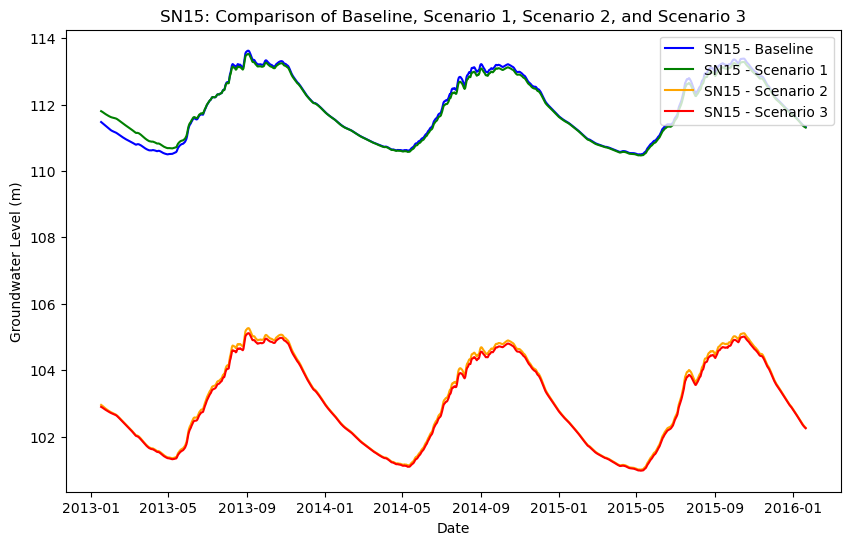

SN16 - Scenario 1 Difference:
Mean Regular Difference: 0.01 m
SN16 - Scenario 2 Difference:
Mean Regular Difference: 10.09 m
SN16 - Scenario 3 Difference:
Mean Regular Difference: 10.15 m


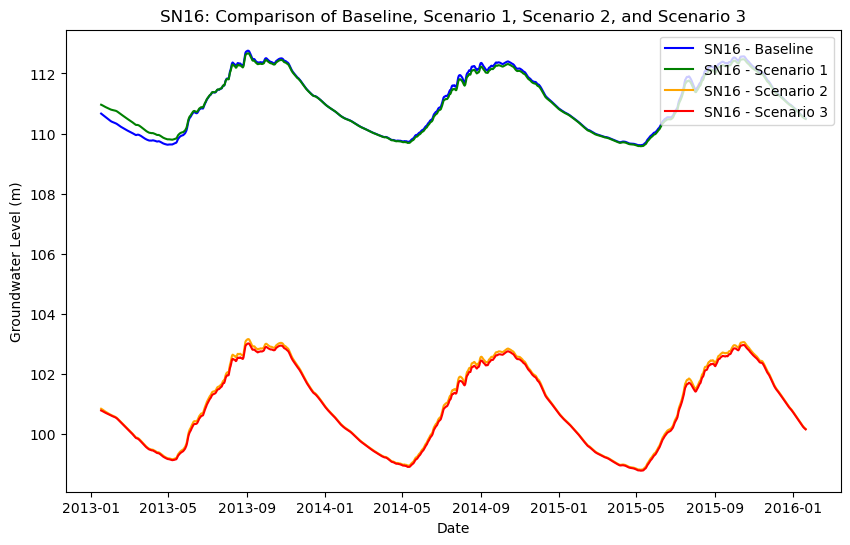

SN18 - Scenario 1 Difference:
Mean Regular Difference: -0.04 m
SN18 - Scenario 2 Difference:
Mean Regular Difference: 11.32 m
SN18 - Scenario 3 Difference:
Mean Regular Difference: 11.50 m


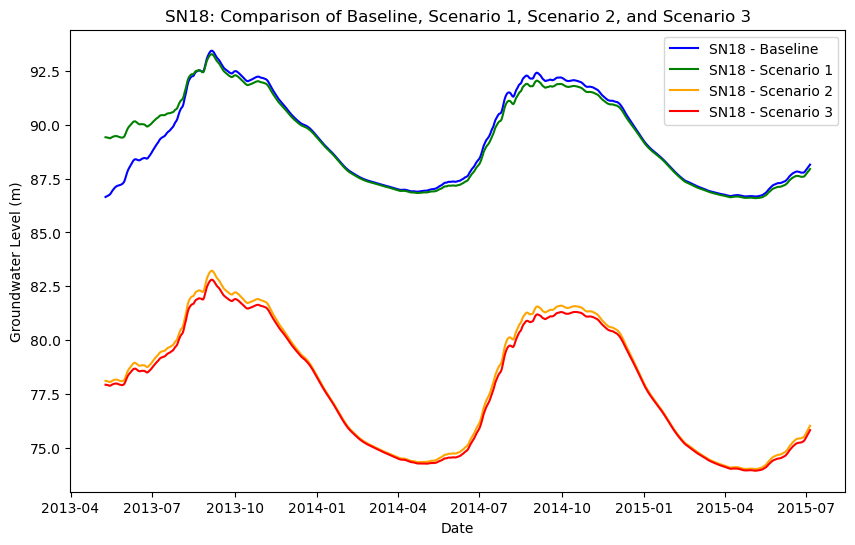

SN21 - Scenario 1 Difference:
Mean Regular Difference: -0.04 m
SN21 - Scenario 2 Difference:
Mean Regular Difference: 8.35 m
SN21 - Scenario 3 Difference:
Mean Regular Difference: 8.44 m


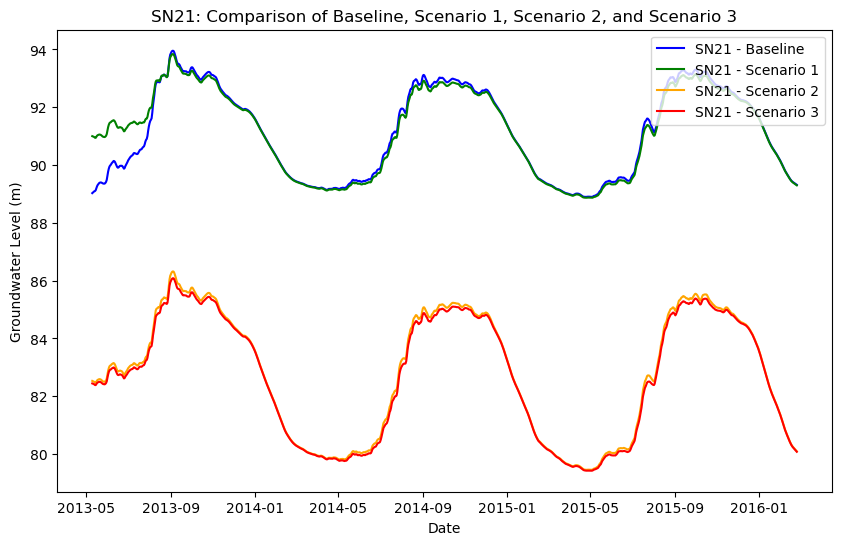

SN22 - Scenario 1 Difference:
Mean Regular Difference: 0.17 m
SN22 - Scenario 2 Difference:
Mean Regular Difference: 7.82 m
SN22 - Scenario 3 Difference:
Mean Regular Difference: 7.82 m


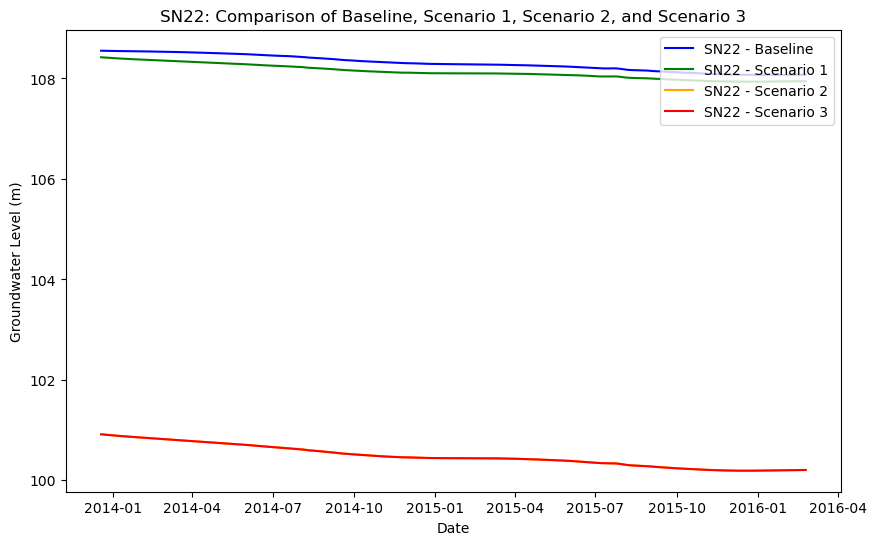

In [20]:
def calculate_difference(reference, compare):
    """Calculate mean regular difference between two time series."""
    regular_difference = reference - compare
    mean_regular_difference = regular_difference.mean()
    return mean_regular_difference

def quantify_difference(well_name, baseline, scenario, scenario_name):
    """Quantify and print the difference between baseline and a scenario."""
    regular_diff = calculate_difference(baseline.iloc[:, 1], scenario.iloc[:, 1])
    
    print(f"{well_name} - {scenario_name} Difference:")
    print(f"Mean Regular Difference: {regular_diff:.2f} m")

def plot_well(well_name):
    #path = "E://Datafiles_Sesay//Output//"
    path = "E://DA//Datafiles_Sesay//Output//" 
    
    # Load CSV files with dayfirst=False
    baseline = pd.read_csv(path + f'{well_name}_baseline.csv', parse_dates=[0], dayfirst=False)
    scenario1 = pd.read_csv(path + f'{well_name}_scenario1.csv', parse_dates=[0], dayfirst=False)
    scenario2 = pd.read_csv(path + f'{well_name}_scenario2.csv', parse_dates=[0], dayfirst=False)
    scenario3 = pd.read_csv(path + f'{well_name}_scenario3.csv', parse_dates=[0], dayfirst=False)

    # Quantify differences
    quantify_difference(well_name, baseline, scenario1, "Scenario 1")
    quantify_difference(well_name, baseline, scenario2, "Scenario 2")
    quantify_difference(well_name, baseline, scenario3, "Scenario 3")

    # Create a figure
    plt.figure(figsize=(10, 6))
    plt.plot(baseline.iloc[:, 0], baseline.iloc[:, 1], label=f'{well_name} - Baseline', color='blue')
    plt.plot(scenario1.iloc[:, 0], scenario1.iloc[:, 1], label=f'{well_name} - Scenario 1', color='green')
    plt.plot(scenario2.iloc[:, 0], scenario2.iloc[:, 1], label=f'{well_name} - Scenario 2', color='orange')
    plt.plot(scenario3.iloc[:, 0], scenario3.iloc[:, 1], label=f'{well_name} - Scenario 3', color='red') 

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Groundwater Level (m)')
    plt.title(f'{well_name}: Comparison of Baseline, Scenario 1, Scenario 2, and Scenario 3')

    # Add legend
    plt.legend(loc='upper right')

    # Show the plot
    plt.show()

# Plot for SN01, SN02, SN03
plot_well("SN01")
plot_well("SN02")
plot_well("SN03")
plot_well("SN05")
plot_well("SN08")
plot_well("SN12")
plot_well("SN13")
plot_well("SN15")
plot_well("SN16")
plot_well("SN18")
plot_well("SN21")
plot_well("SN22")